## Import & Install PySpark

In [2]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 69kB/s 
     |████████████████████████████████| 204kB 44.0MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=2bd37625fe9342a07d0bf5bd86a434a054f8d151b915e92b99a79658df3b809d
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [3]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
sc = pyspark.SparkContext('local[*]')

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### pyspark.sql.SparkSession Main entry point for DataFrame and SQL functionality.
#### The entry point to programming Spark with the Dataset and DataFrame API.

A SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables, cache tables, and read parquet files. To create a SparkSession, use the following builder pattern:
[Source](http://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.SparkSession)

In [5]:
spark = SparkSession.builder.master("local").appName("cs5590").config("spark.some.config.option", "some-value").getOrCreate()

Create Dataframe of NY covid data

In [6]:
dfNYCovid = spark.read.options(header='True', inferSchema='True', delimiter=',') \
  .csv("/content/New_York_State_Statewide_COVID-19_Testing.csv")
dfNYCovid.show()

+---------+------+-------------+------------------------------+-------------------------------+------------------------------------+
|Test Date|County|New Positives|Cumulative Number of Positives|Total Number of Tests Performed|Cumulative Number of Tests Performed|
+---------+------+-------------+------------------------------+-------------------------------+------------------------------------+
| 3/1/2020|Albany|            0|                             0|                              0|                                   0|
| 3/2/2020|Albany|            0|                             0|                              0|                                   0|
| 3/3/2020|Albany|            0|                             0|                              0|                                   0|
| 3/4/2020|Albany|            0|                             0|                              0|                                   0|
| 3/5/2020|Albany|            0|                             0|      

Get a list of the unique county names

In [7]:
dfCounties = dfNYCovid.select('County').distinct()
listCounties = list(dfCounties.select('County').toPandas()['County'])



Get the covid data for a given county

In [8]:
def GetCountyData(df, county):
  dfCounty = df.select('Test Date','New Positives').filter(df.County == county)
  return dfCounty

Draw a graph of the covid positive results for a given county and save it to a file.

In [9]:
def DrawGraph(df, county):
  df_plot = df.toPandas()

  df_plot.plot(x="Test Date", y=["New Positives"], figsize=(16,10))
  fig1 = plt.gcf()
  plt.show()
  plt.draw()
  fig1.savefig("/content/gdrive/MyDrive/Hackathon/" + county + '.png', dpi=100)


Generate graphs for all of the NY counties

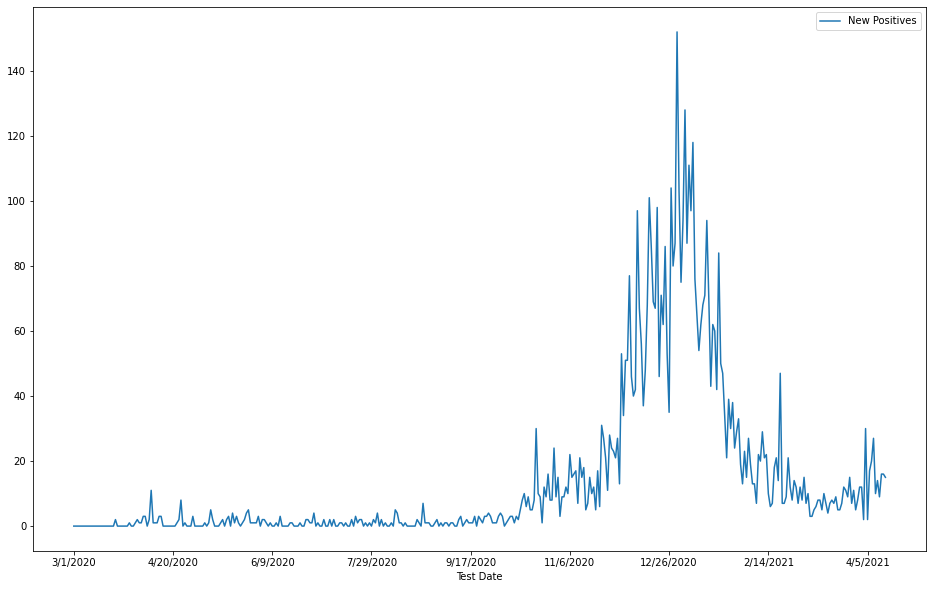

<Figure size 432x288 with 0 Axes>

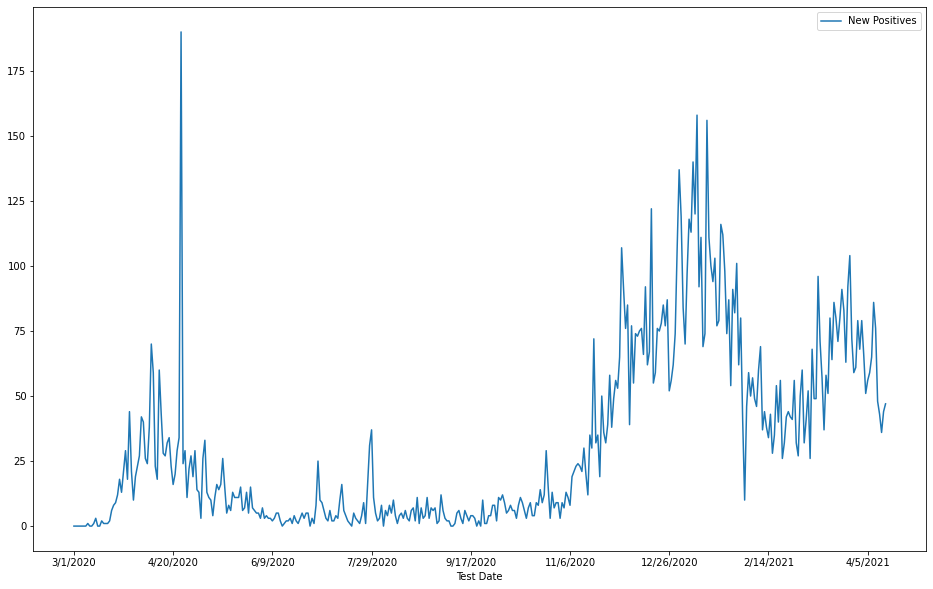

<Figure size 432x288 with 0 Axes>

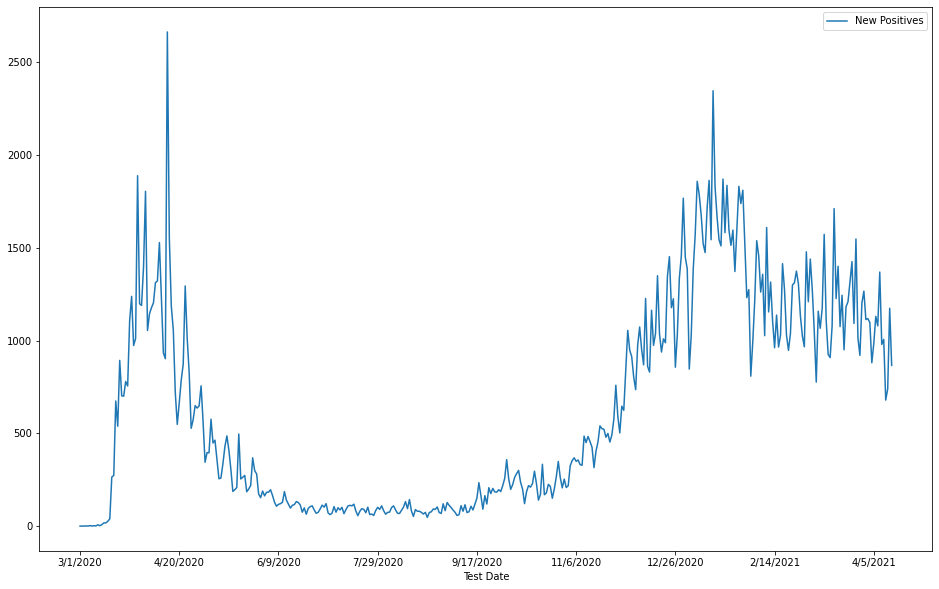

<Figure size 432x288 with 0 Axes>

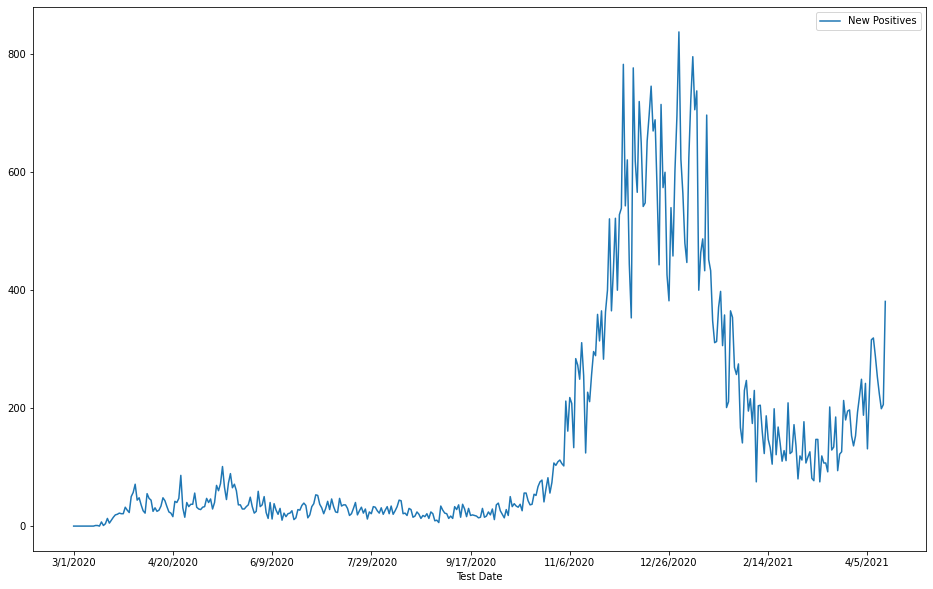

<Figure size 432x288 with 0 Axes>

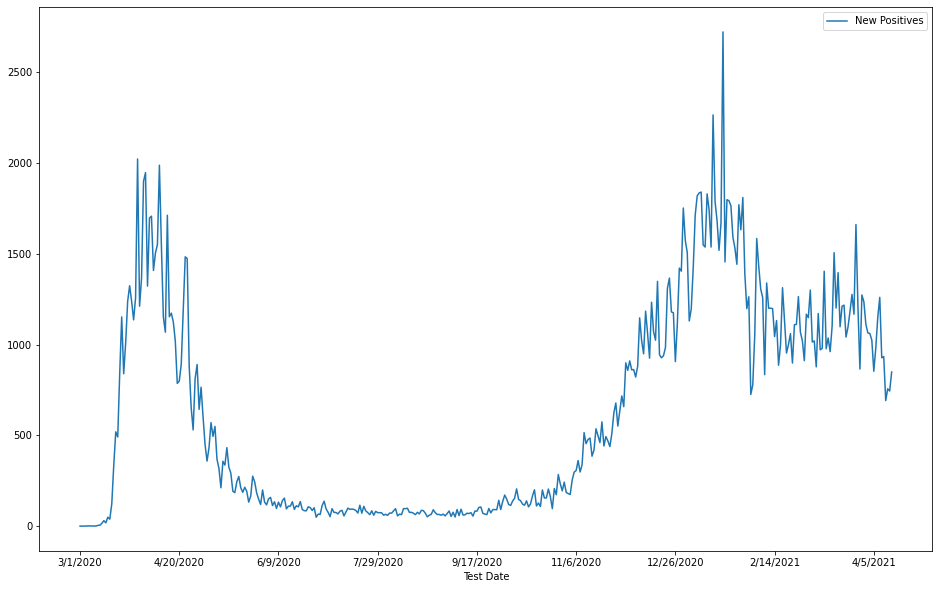

<Figure size 432x288 with 0 Axes>

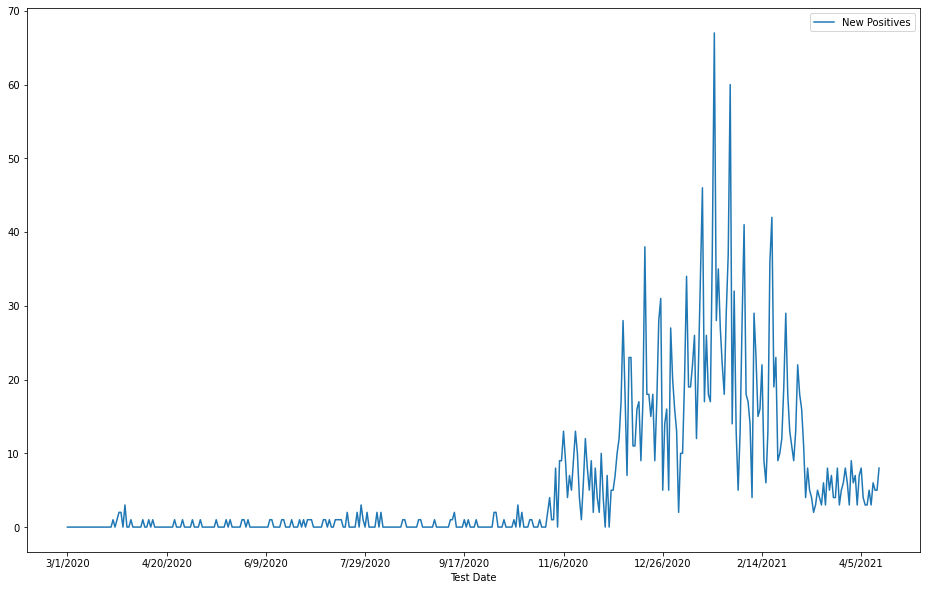

<Figure size 432x288 with 0 Axes>

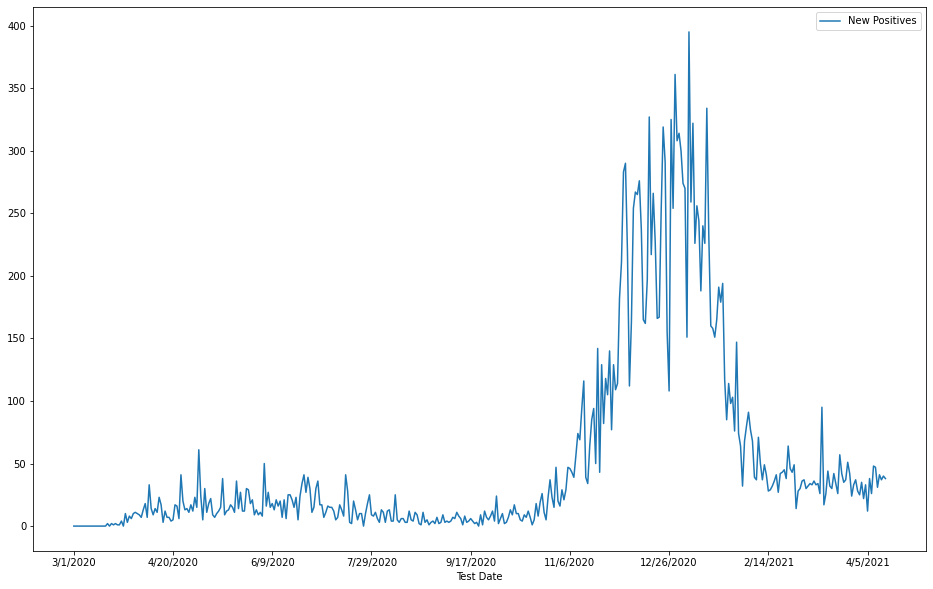

<Figure size 432x288 with 0 Axes>

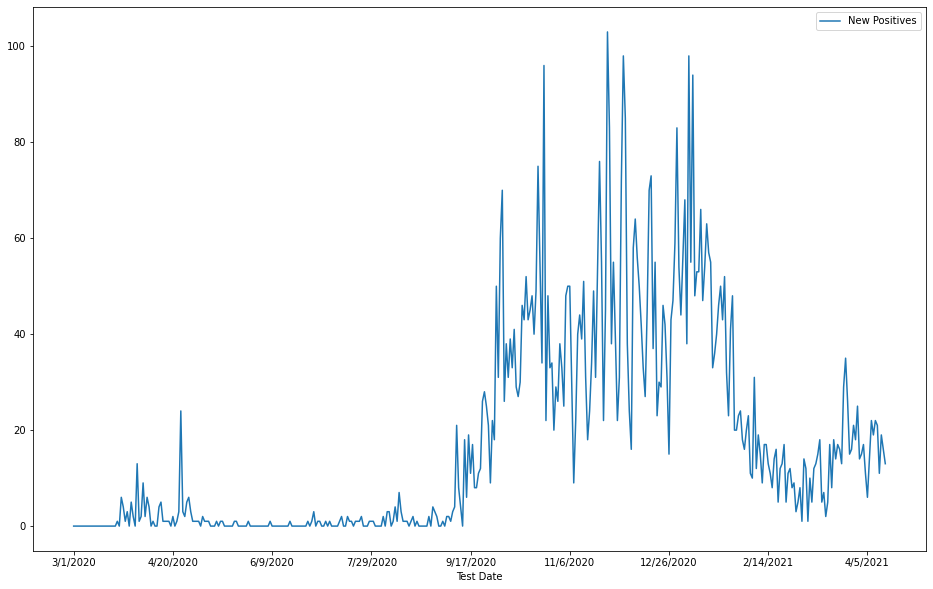

<Figure size 432x288 with 0 Axes>

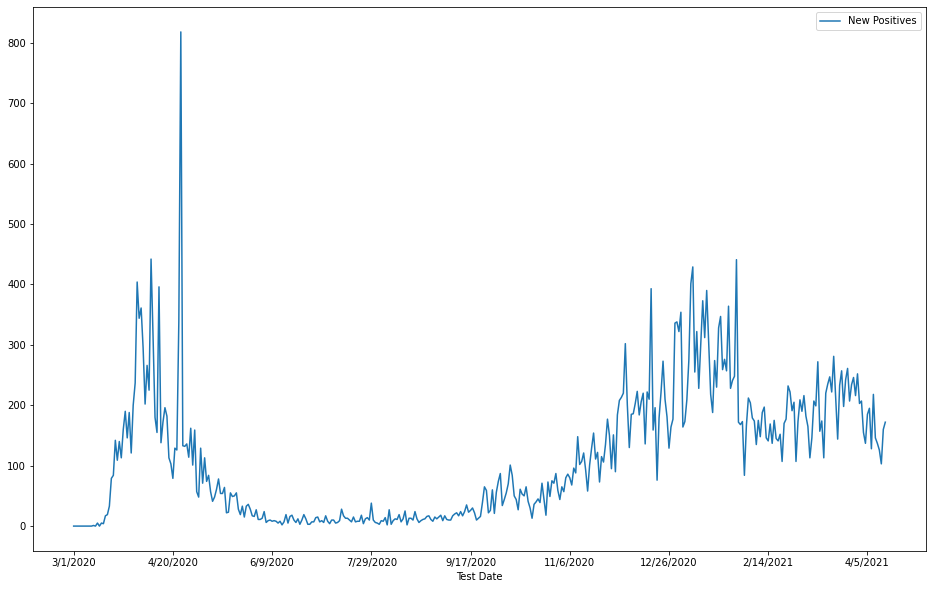

<Figure size 432x288 with 0 Axes>

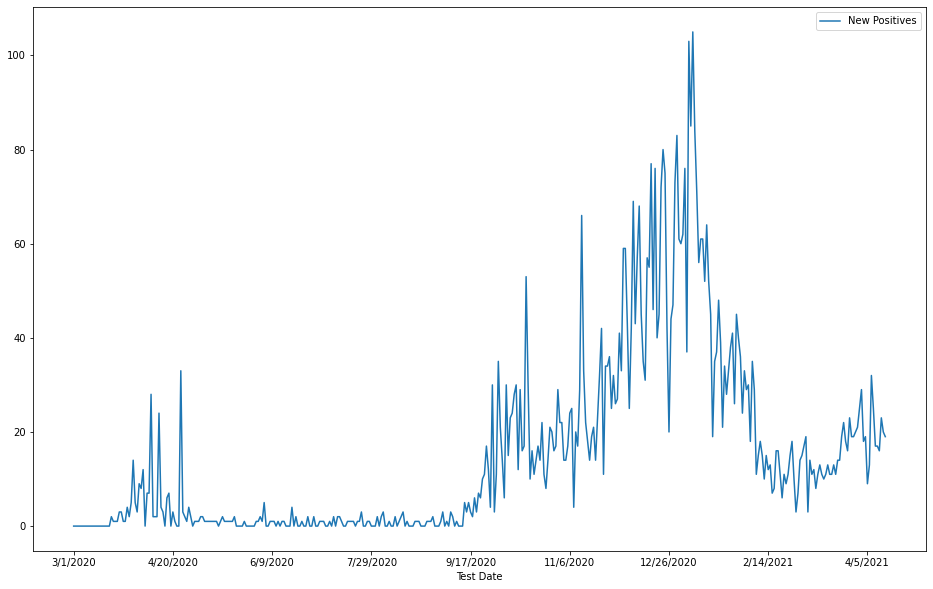

<Figure size 432x288 with 0 Axes>

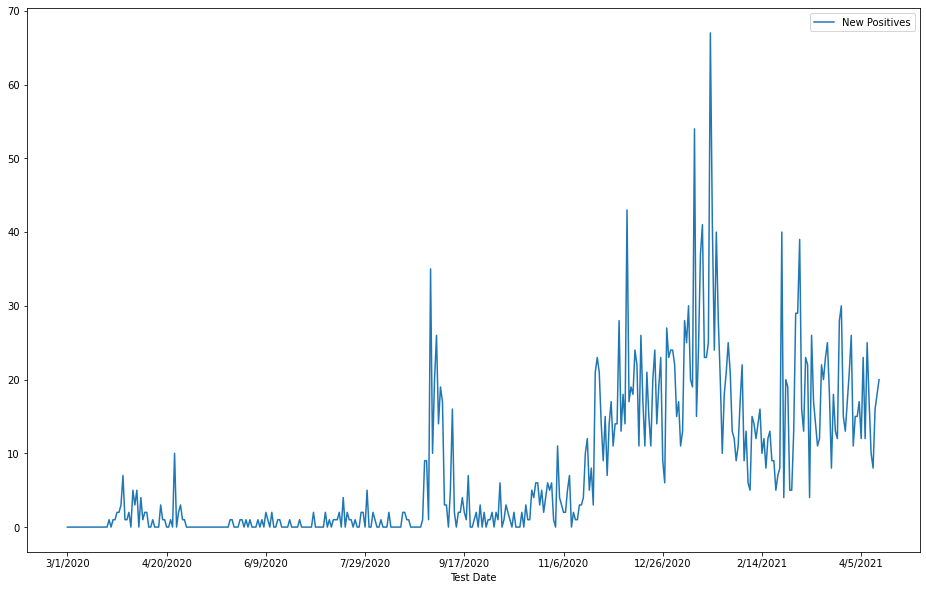

<Figure size 432x288 with 0 Axes>

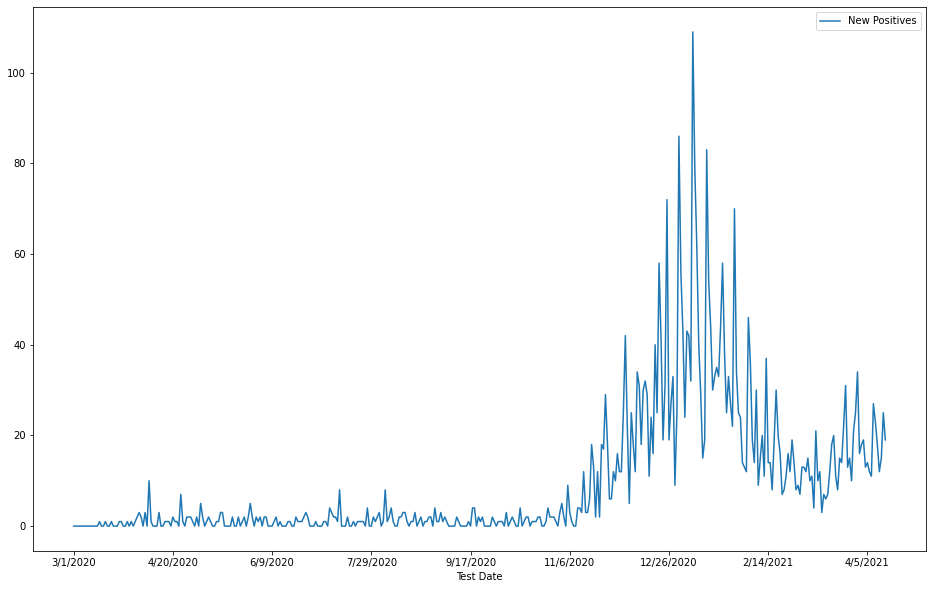

<Figure size 432x288 with 0 Axes>

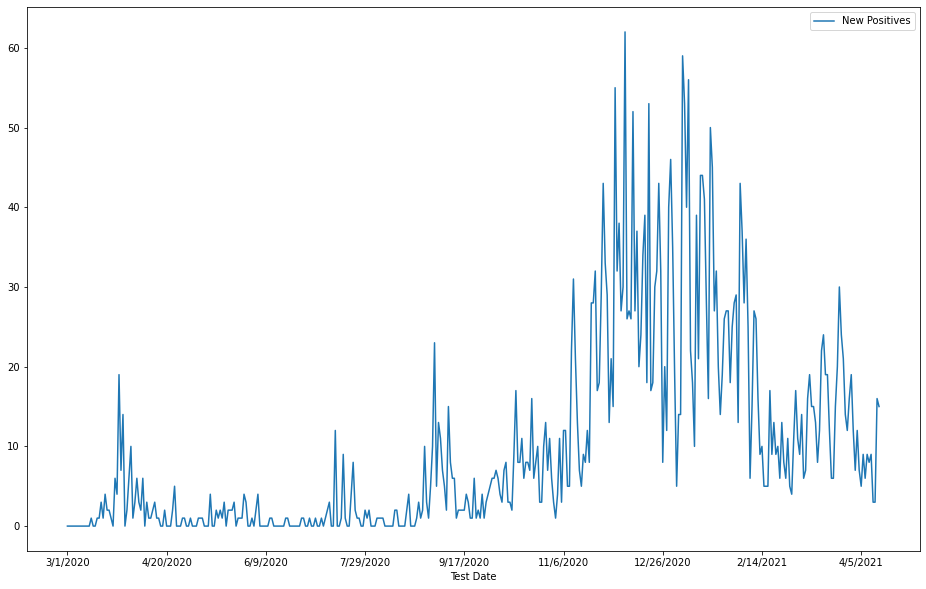

<Figure size 432x288 with 0 Axes>

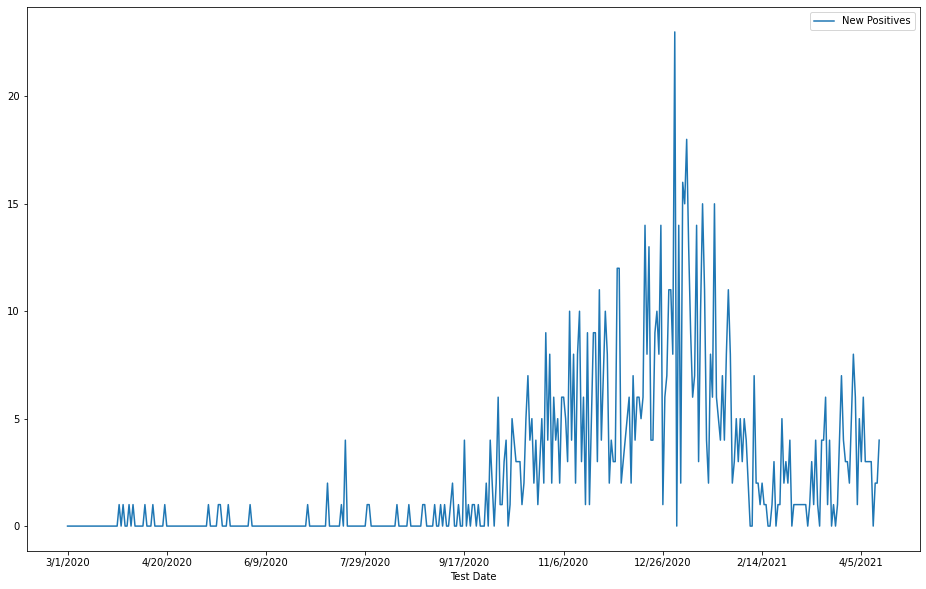

<Figure size 432x288 with 0 Axes>

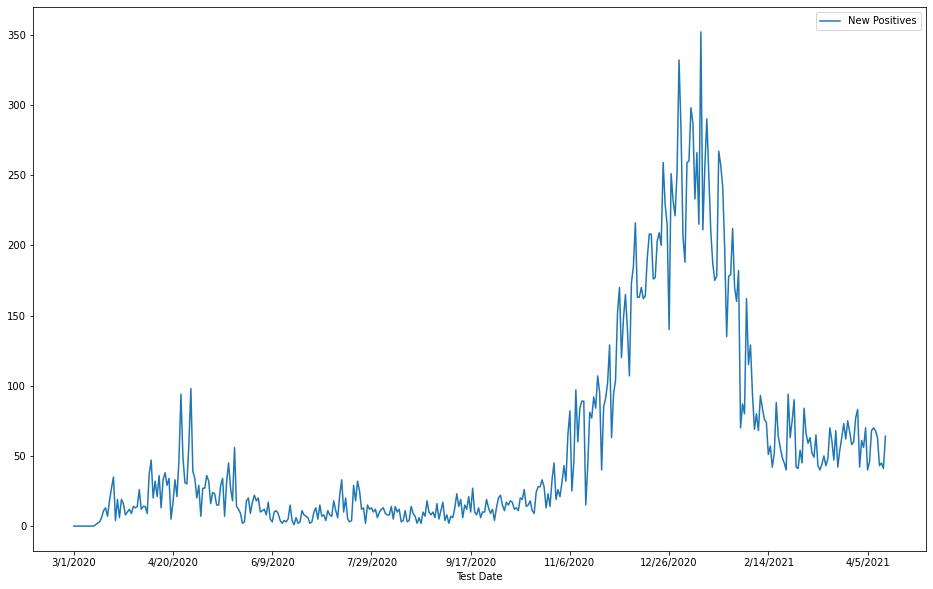

<Figure size 432x288 with 0 Axes>

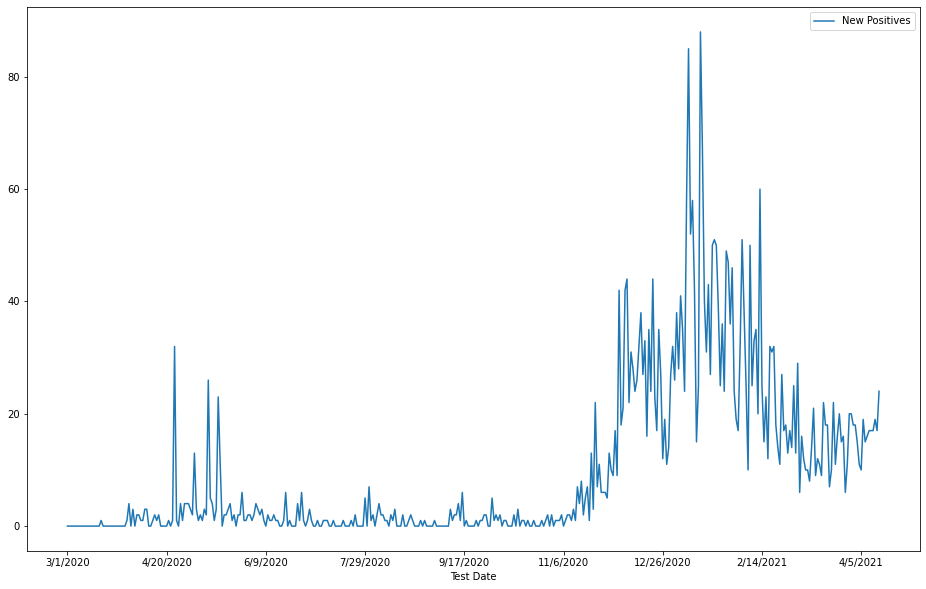

<Figure size 432x288 with 0 Axes>

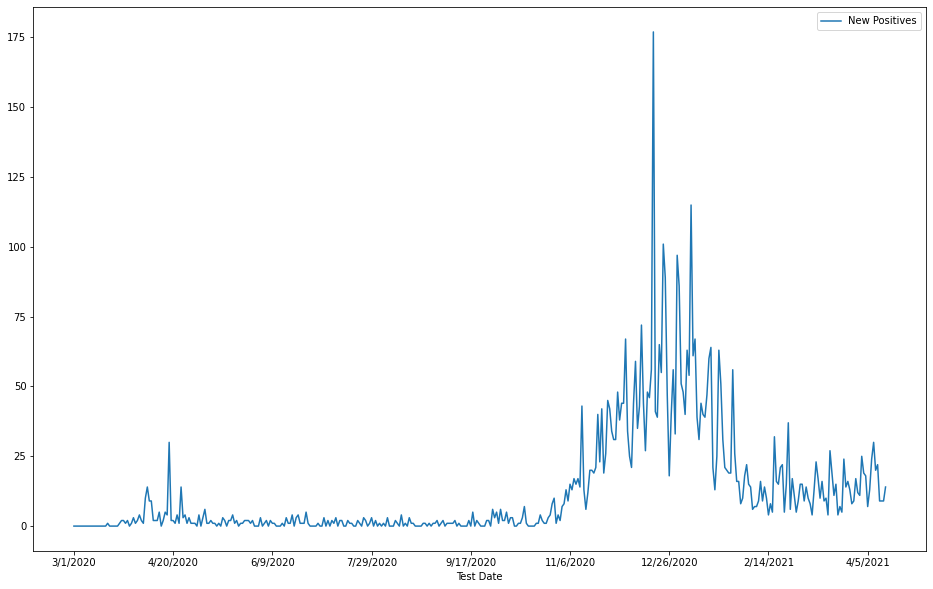

<Figure size 432x288 with 0 Axes>

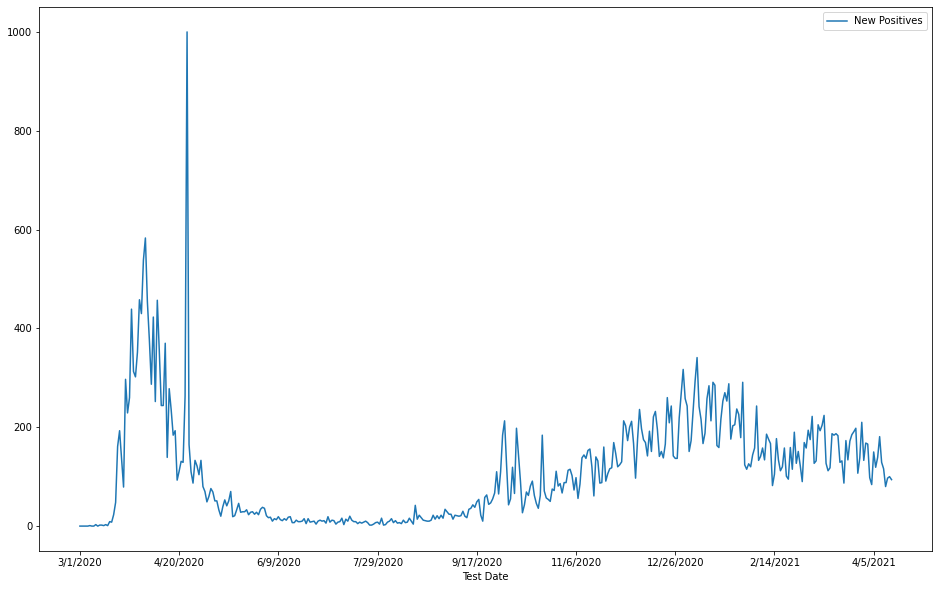

<Figure size 432x288 with 0 Axes>

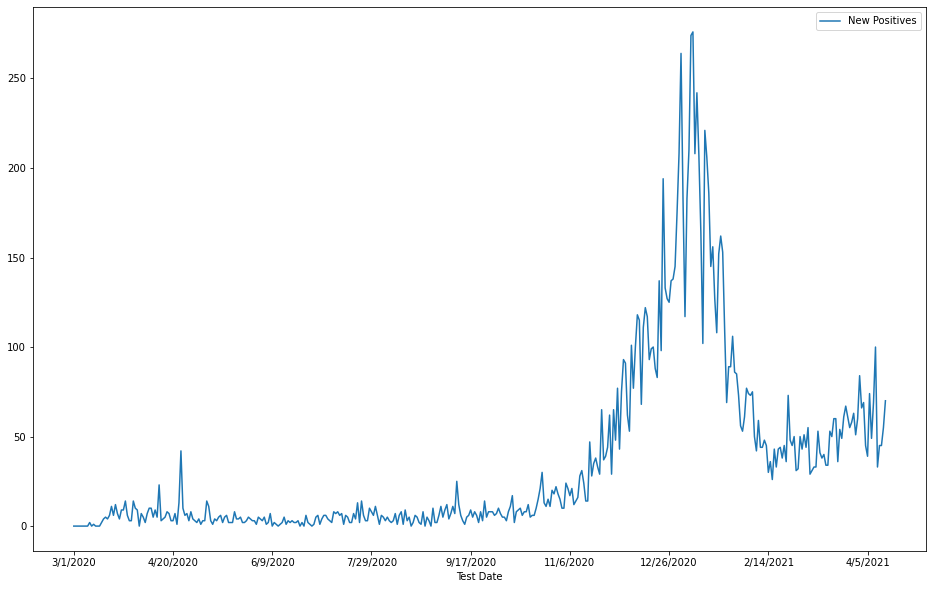

<Figure size 432x288 with 0 Axes>

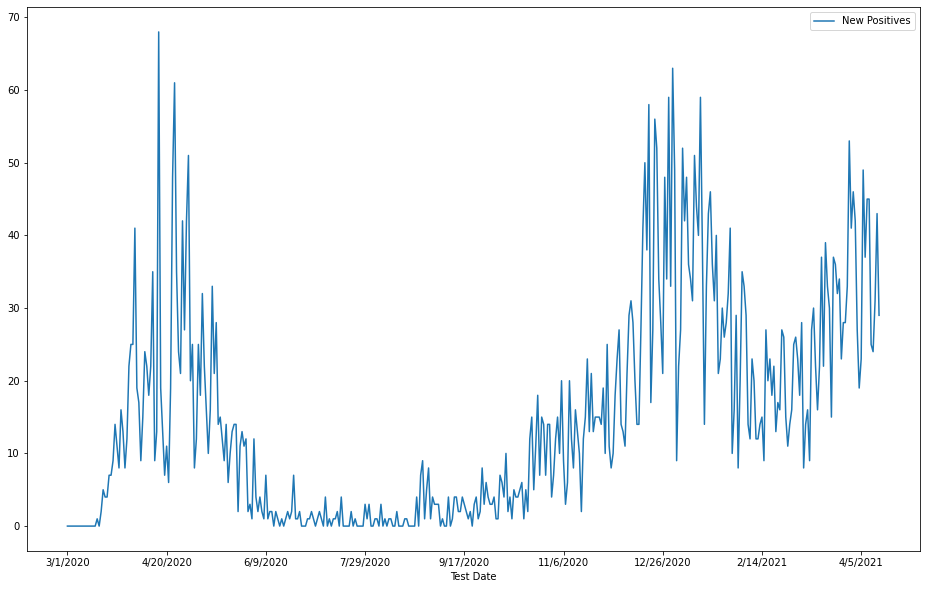

<Figure size 432x288 with 0 Axes>

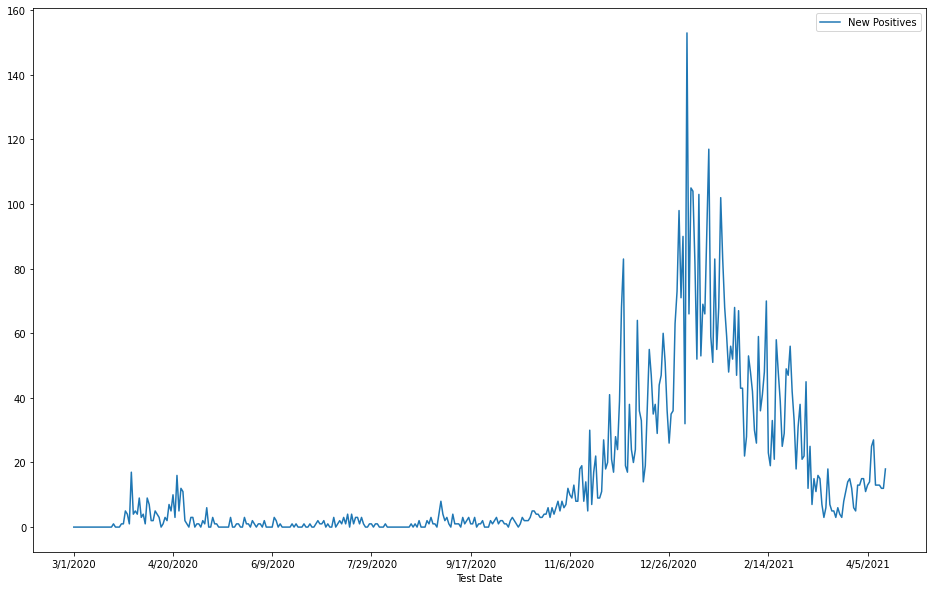

<Figure size 432x288 with 0 Axes>

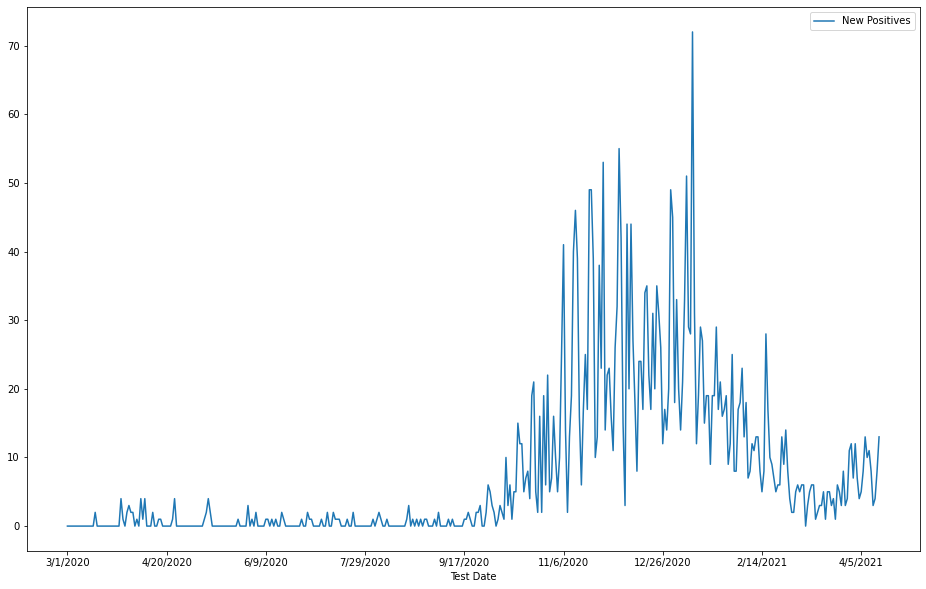

<Figure size 432x288 with 0 Axes>

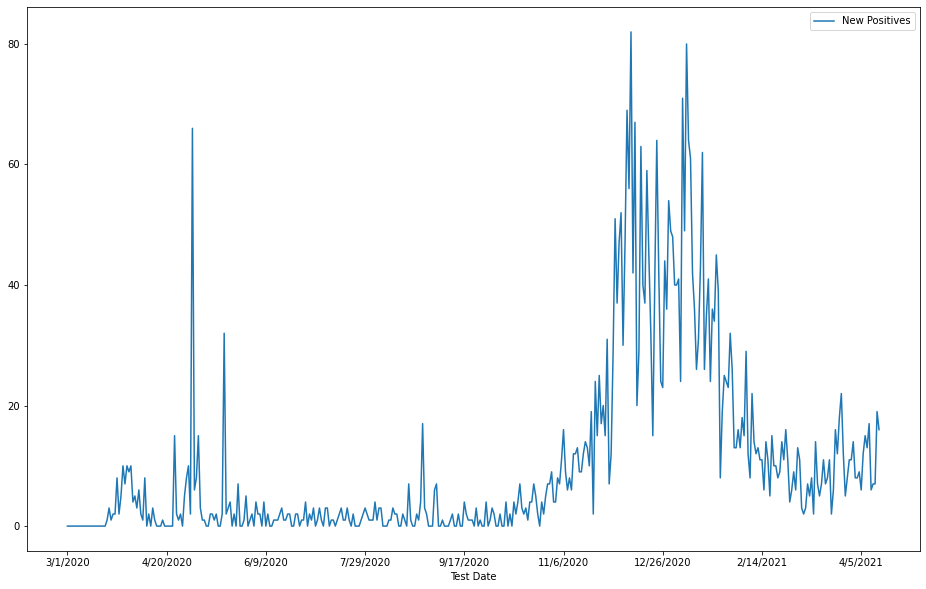

<Figure size 432x288 with 0 Axes>

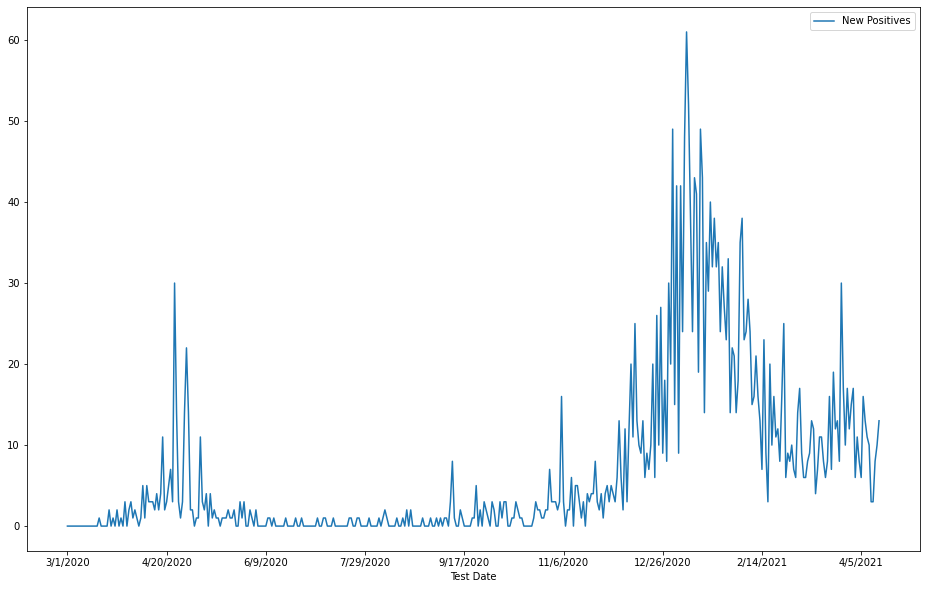

<Figure size 432x288 with 0 Axes>

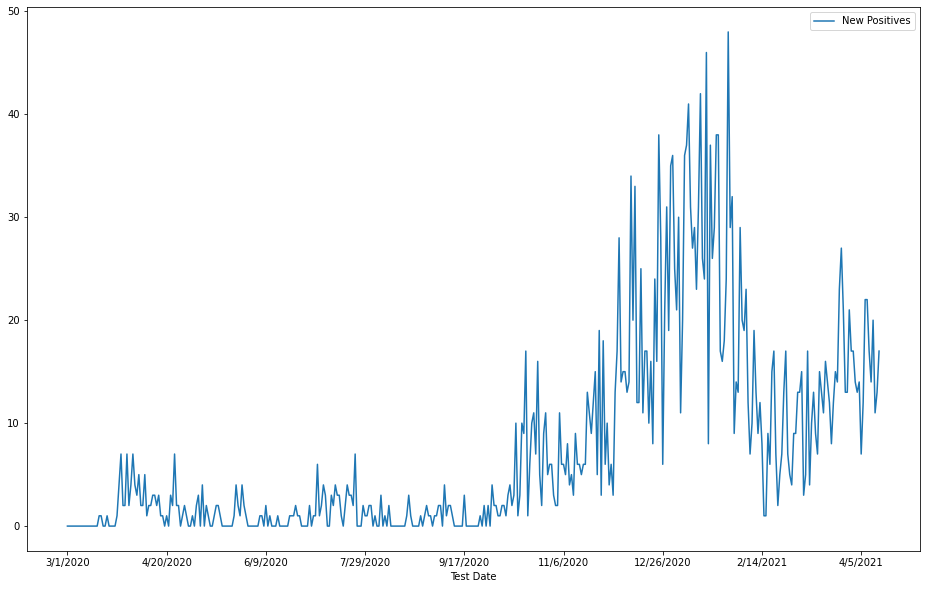

<Figure size 432x288 with 0 Axes>

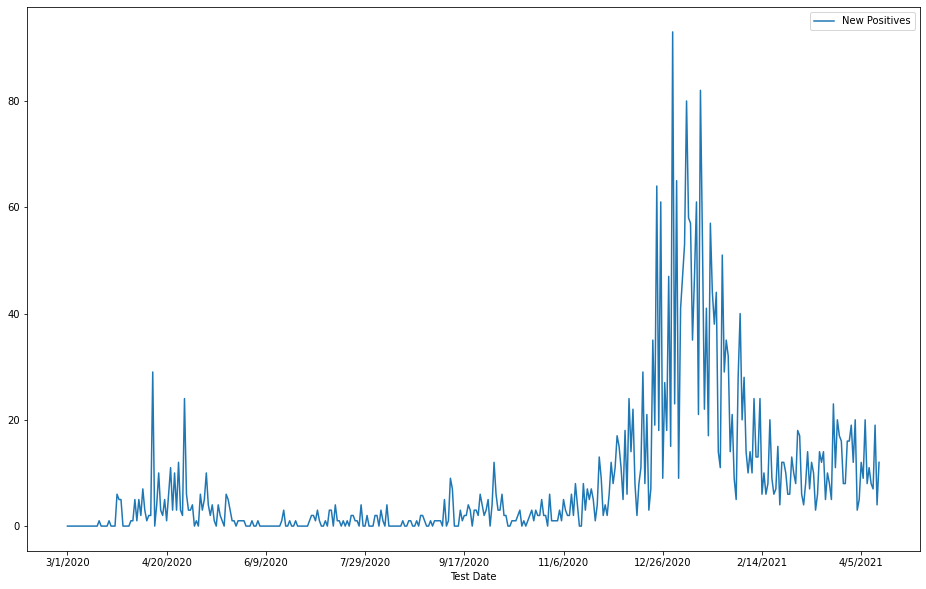

<Figure size 432x288 with 0 Axes>

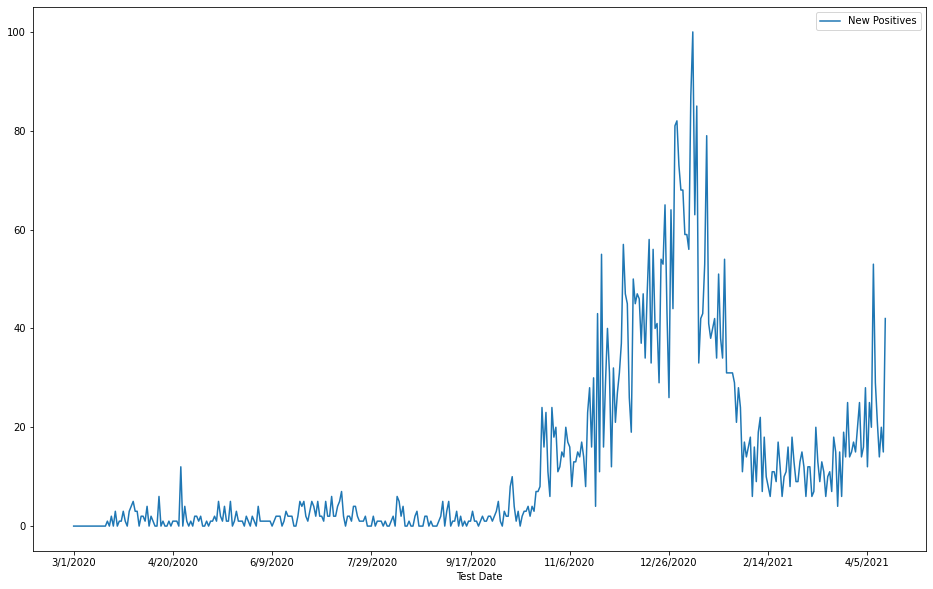

<Figure size 432x288 with 0 Axes>

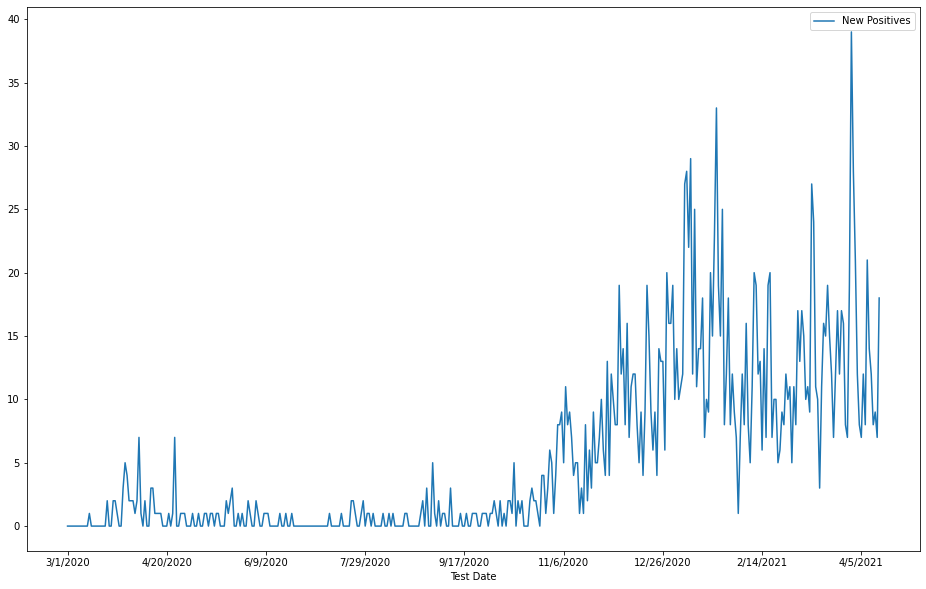

<Figure size 432x288 with 0 Axes>

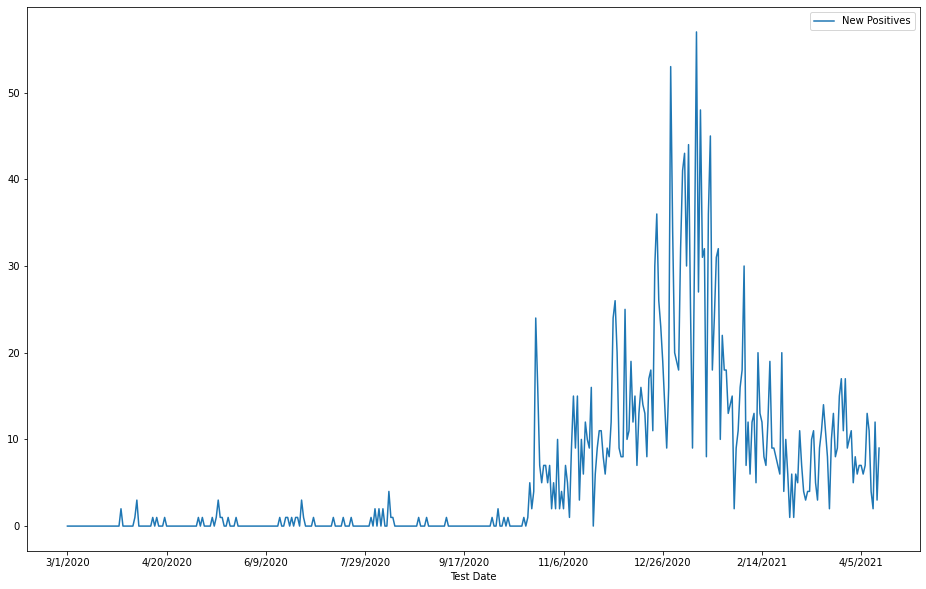

<Figure size 432x288 with 0 Axes>

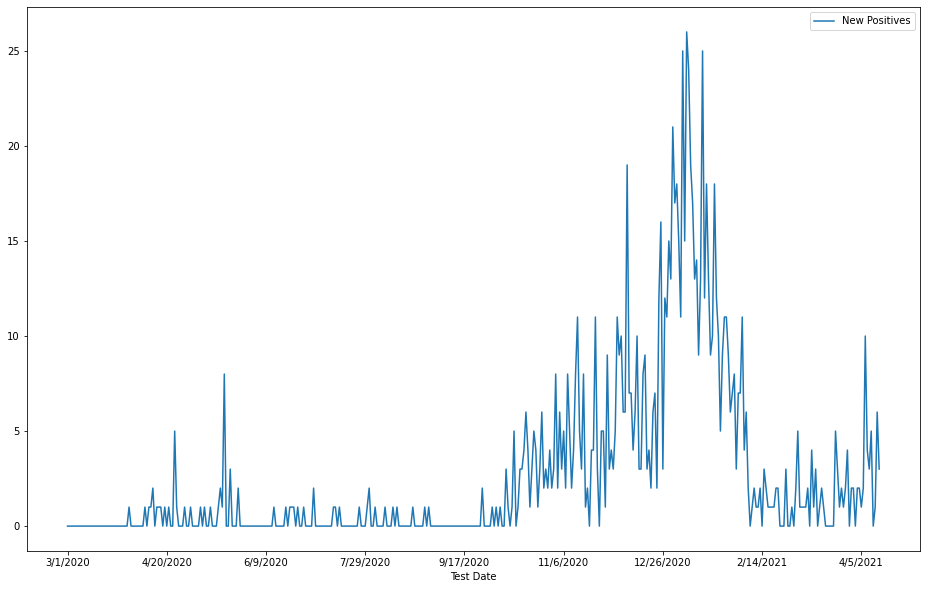

<Figure size 432x288 with 0 Axes>

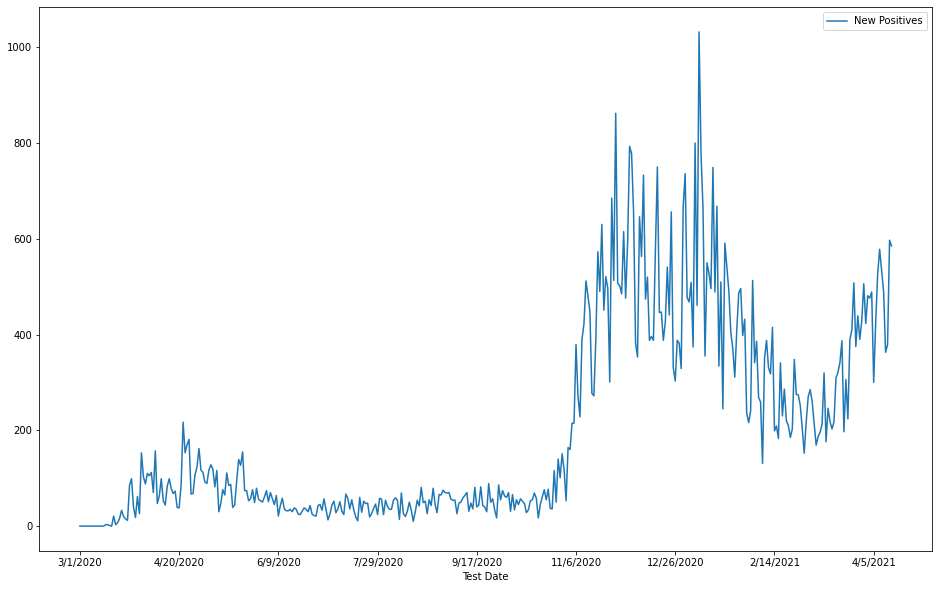

<Figure size 432x288 with 0 Axes>

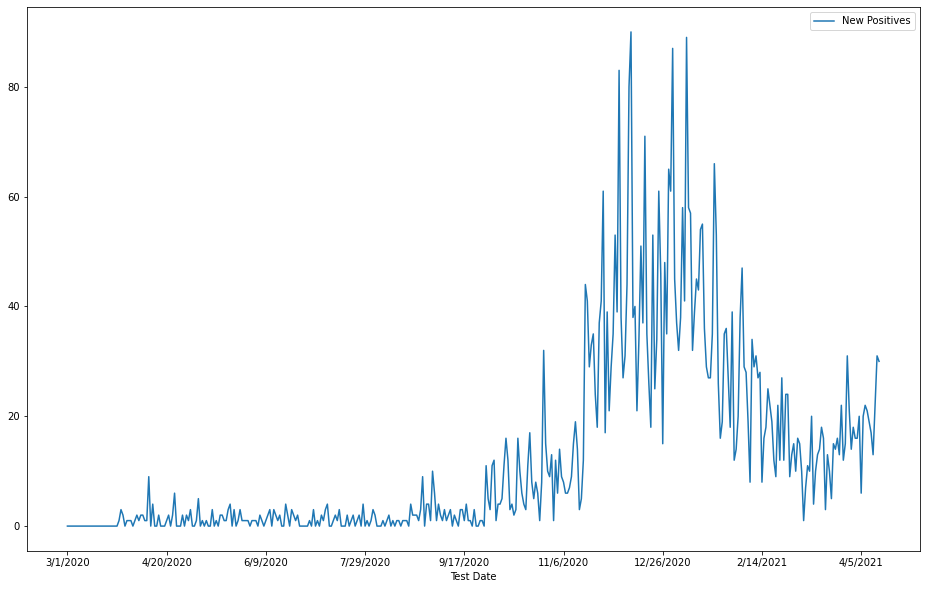

<Figure size 432x288 with 0 Axes>

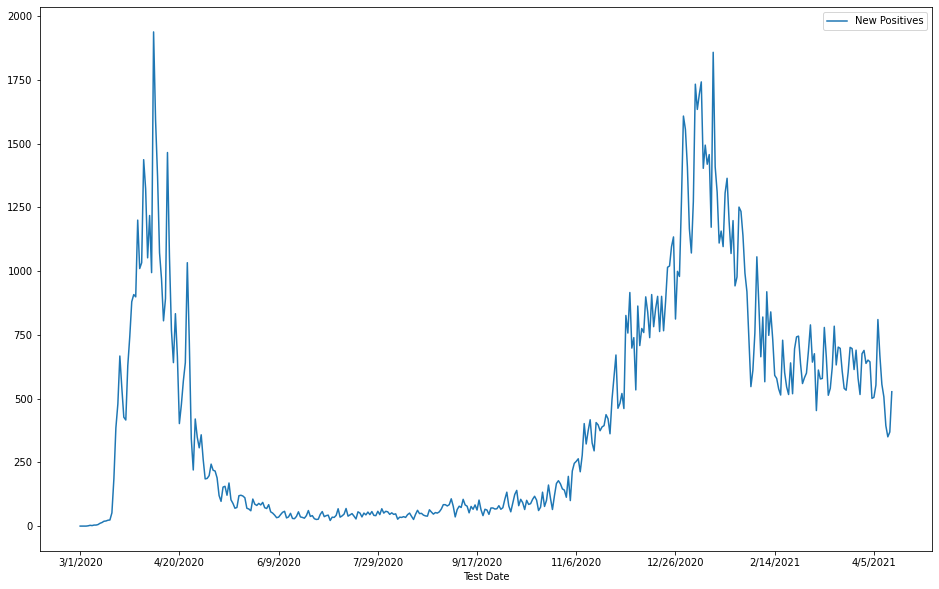

<Figure size 432x288 with 0 Axes>

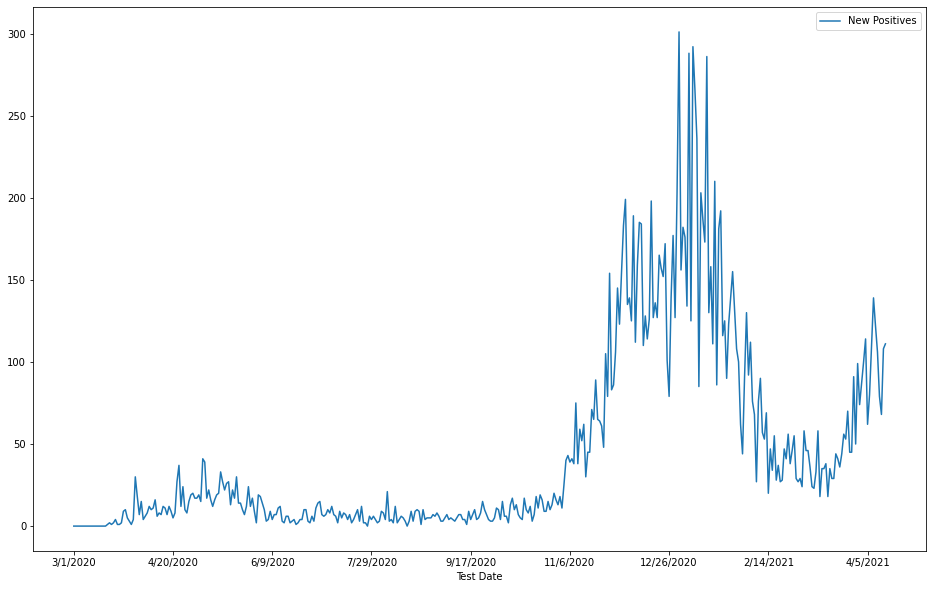

<Figure size 432x288 with 0 Axes>

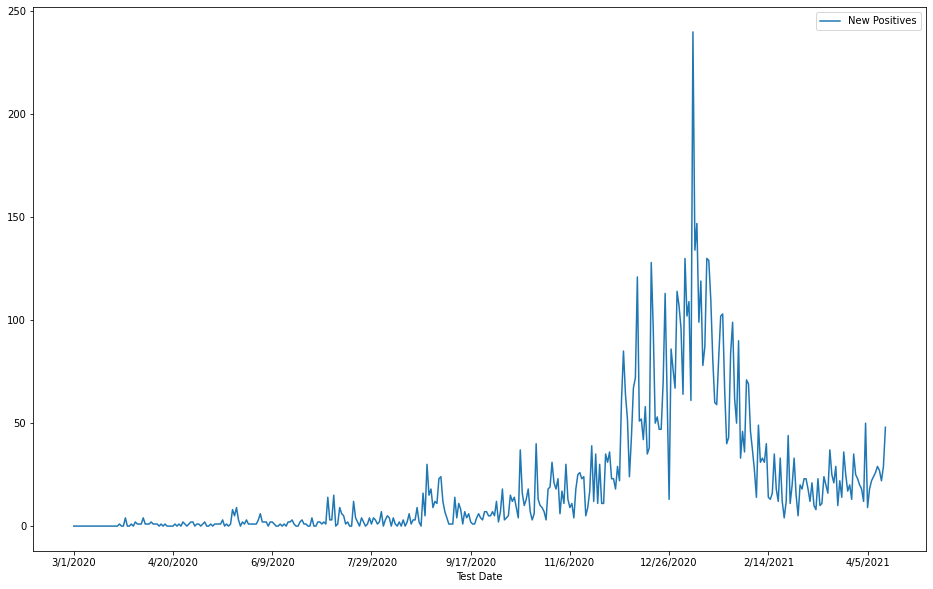

<Figure size 432x288 with 0 Axes>

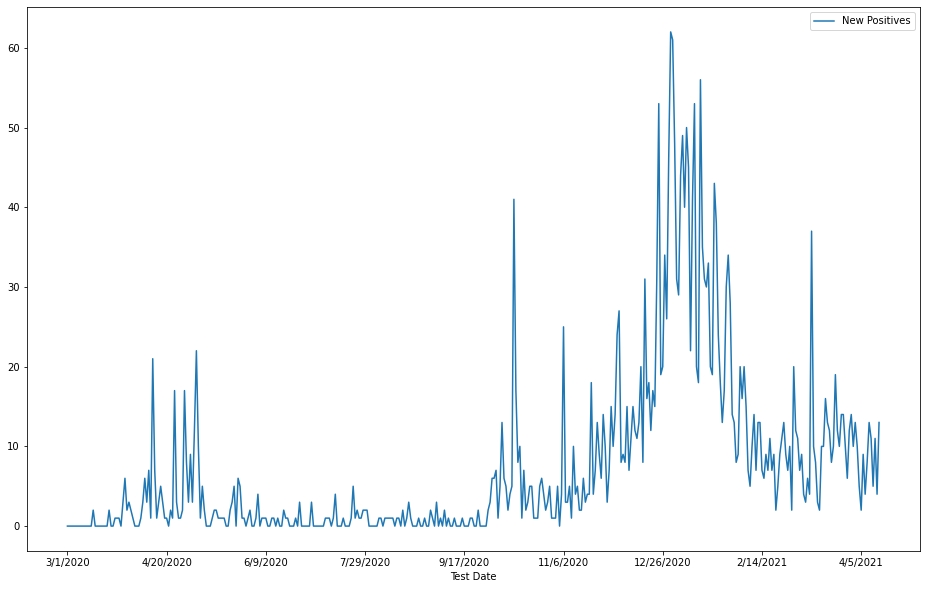

<Figure size 432x288 with 0 Axes>

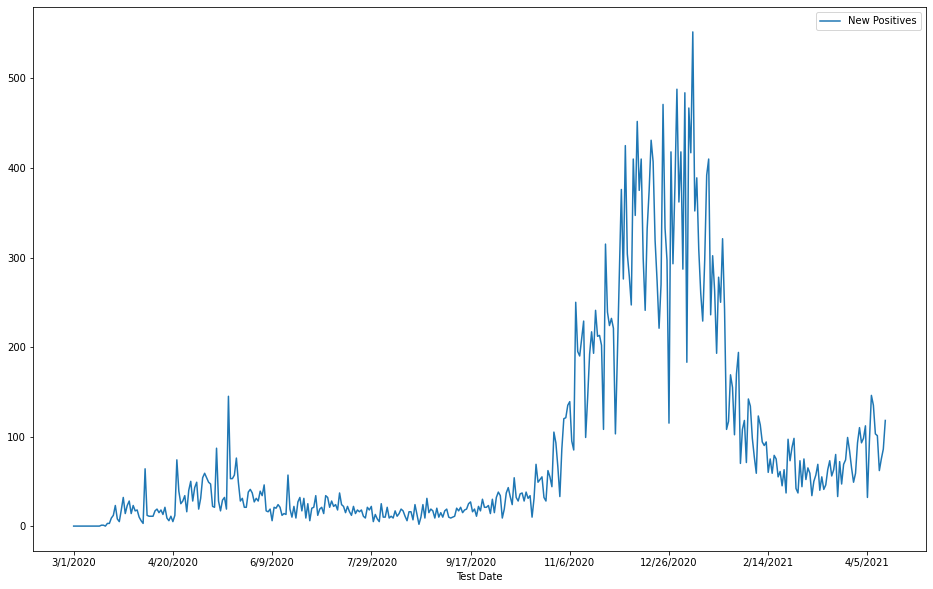

<Figure size 432x288 with 0 Axes>

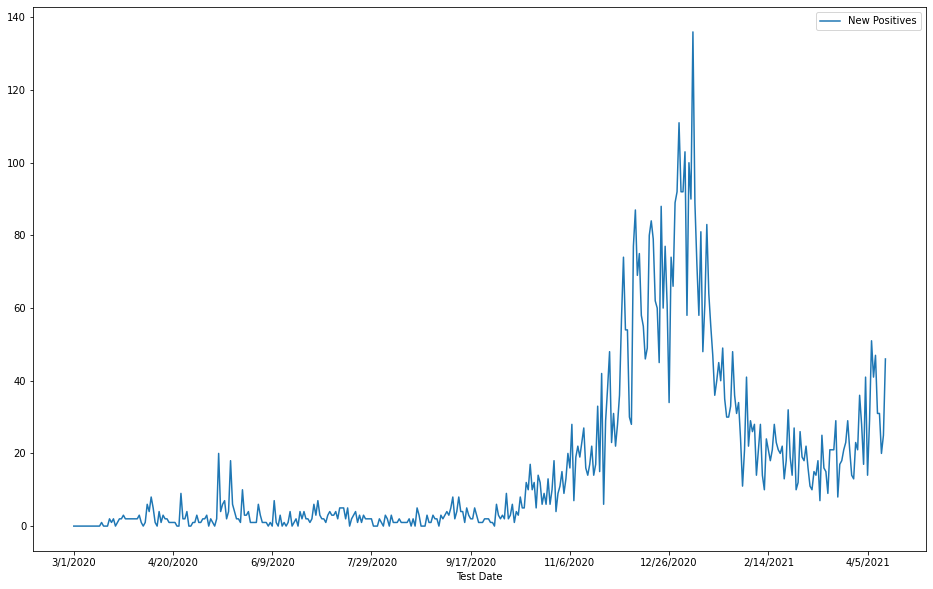

<Figure size 432x288 with 0 Axes>

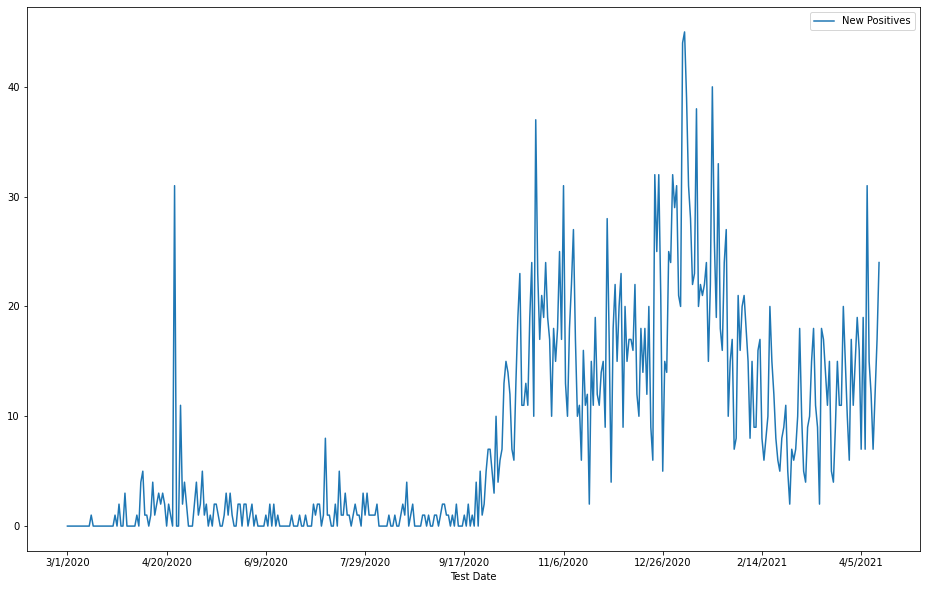

<Figure size 432x288 with 0 Axes>

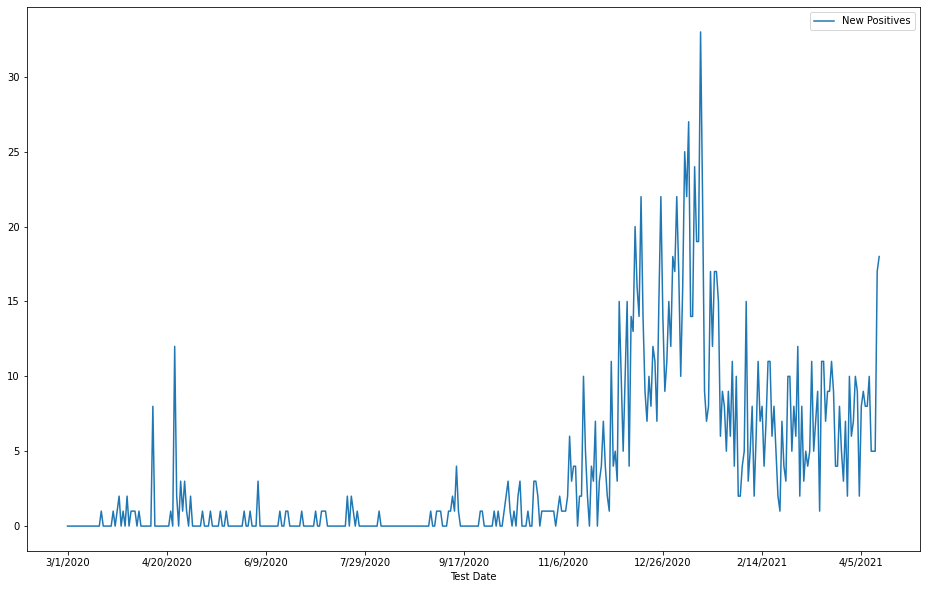

<Figure size 432x288 with 0 Axes>

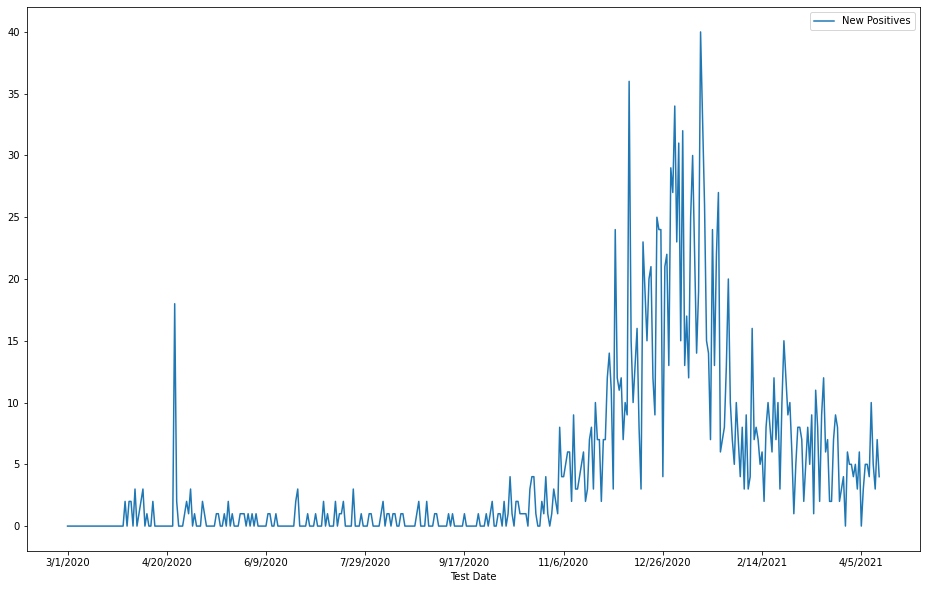

<Figure size 432x288 with 0 Axes>

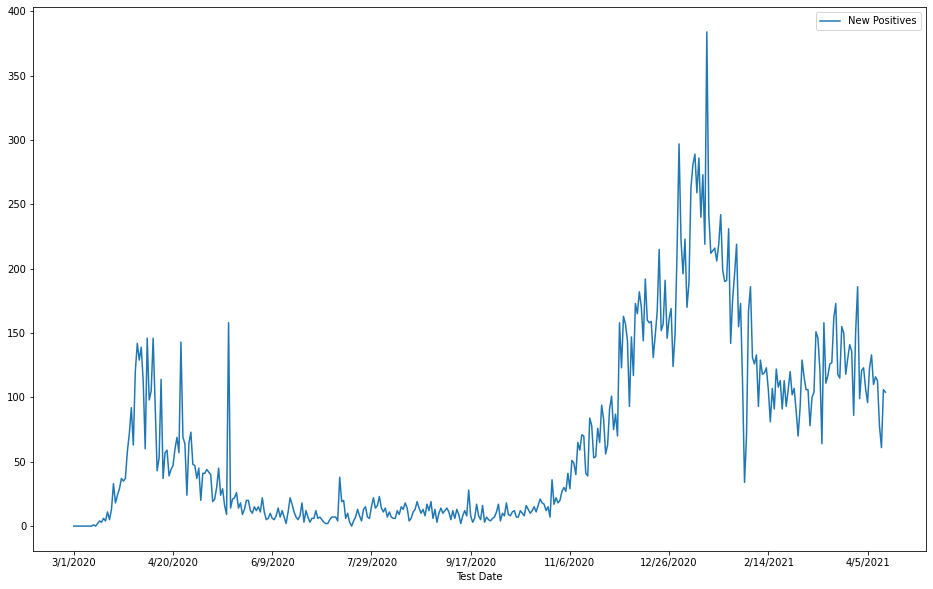

<Figure size 432x288 with 0 Axes>

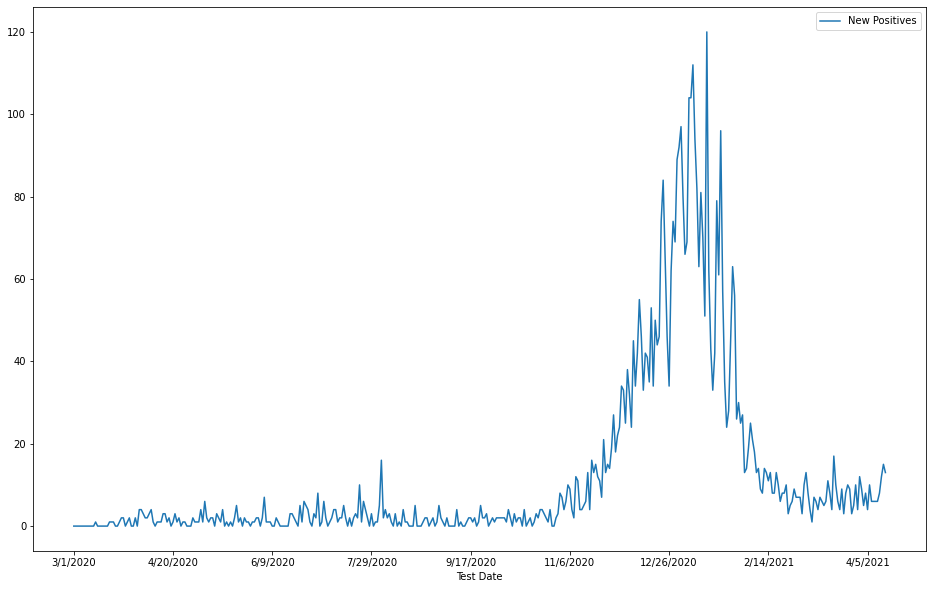

<Figure size 432x288 with 0 Axes>

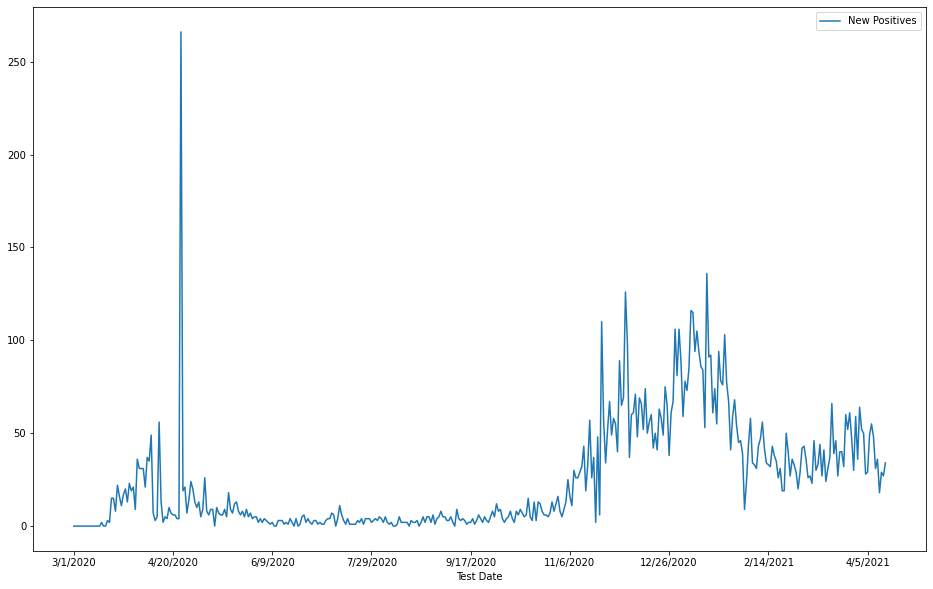

<Figure size 432x288 with 0 Axes>

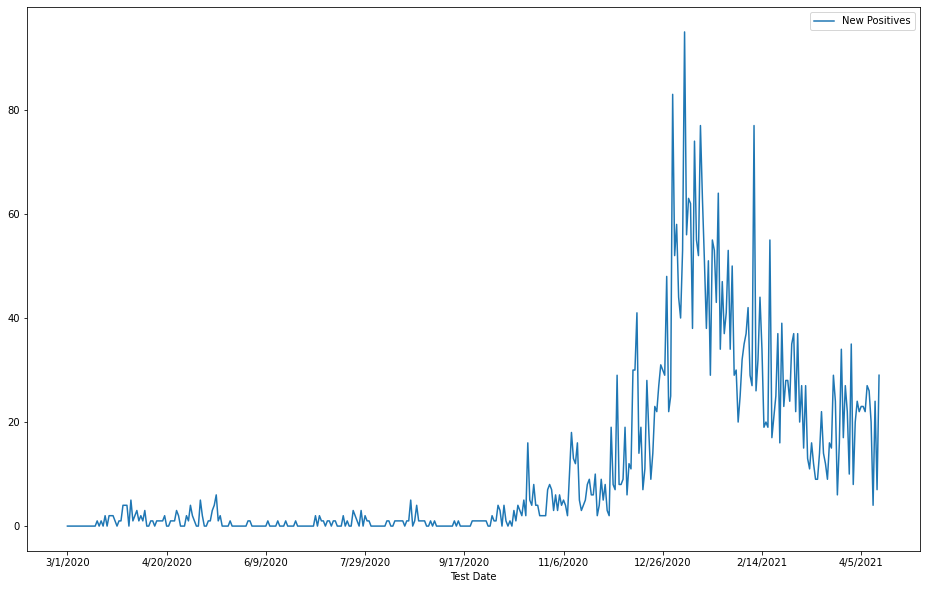

<Figure size 432x288 with 0 Axes>

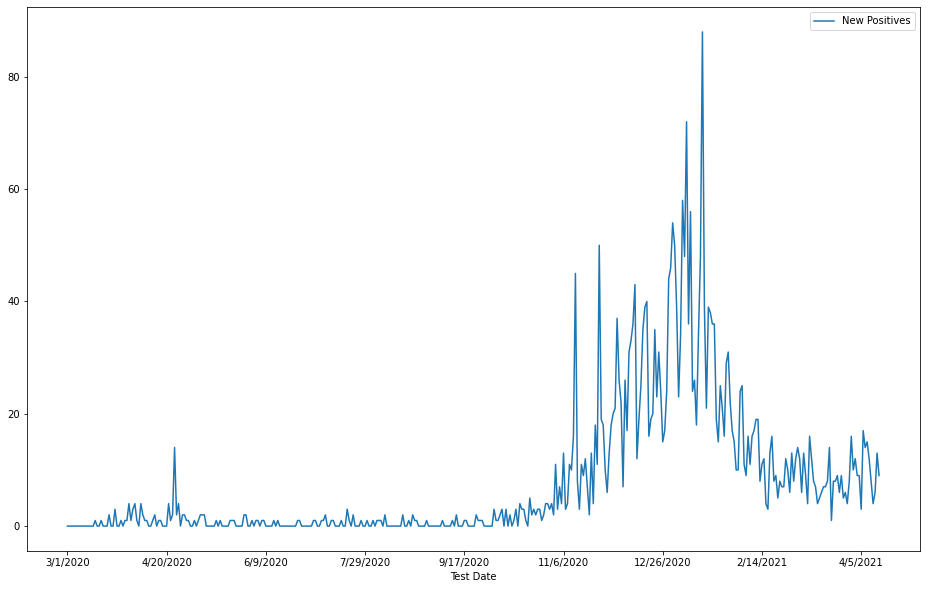

<Figure size 432x288 with 0 Axes>

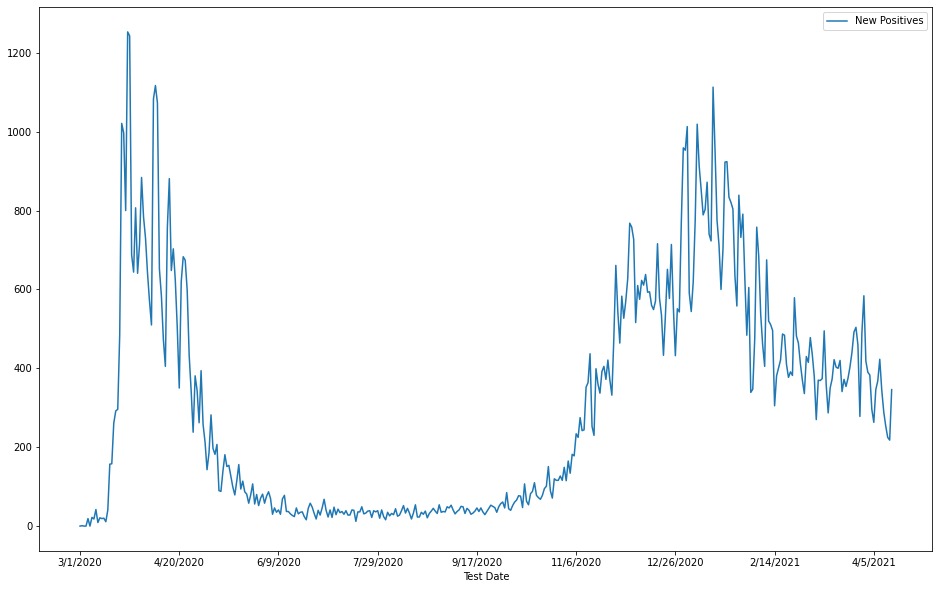

<Figure size 432x288 with 0 Axes>

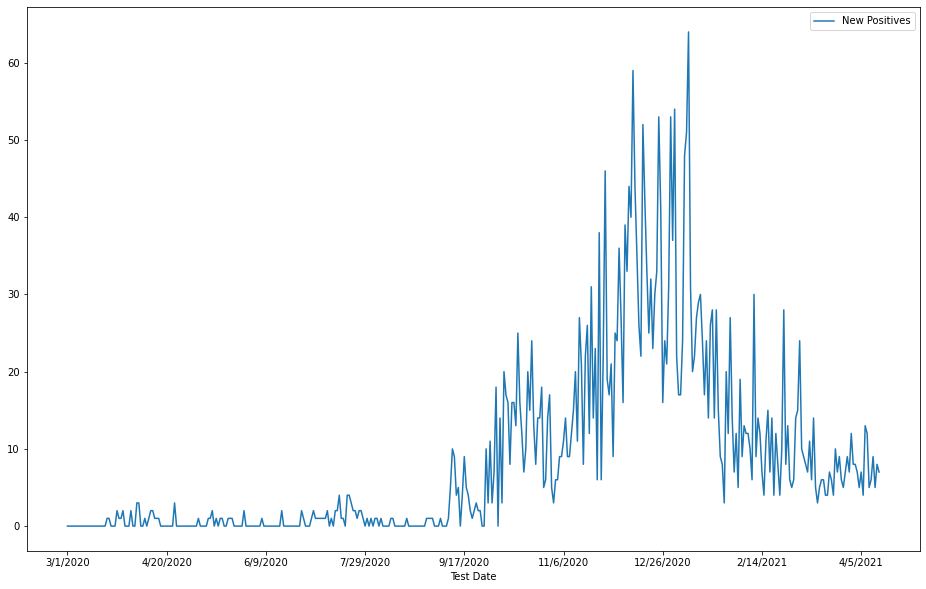

<Figure size 432x288 with 0 Axes>

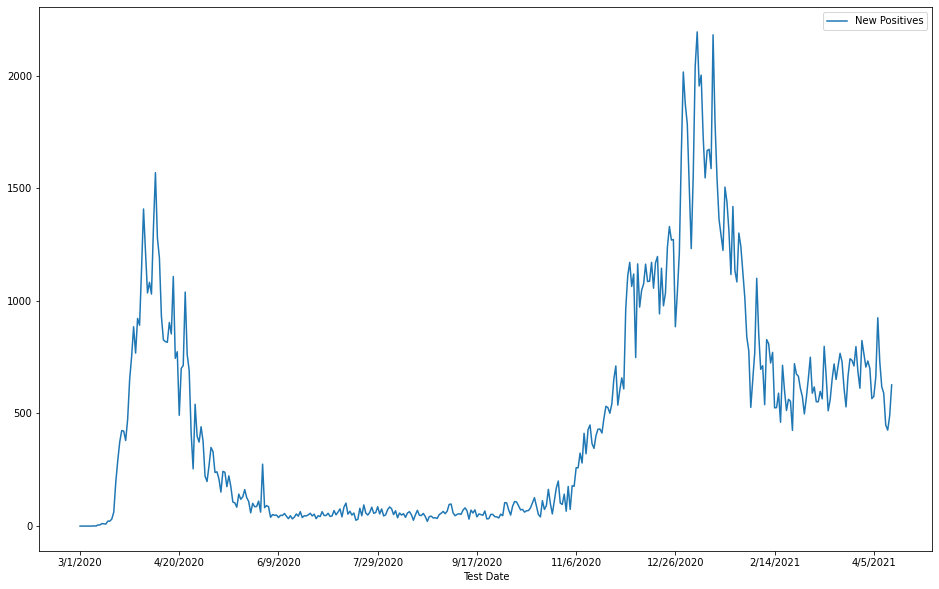

<Figure size 432x288 with 0 Axes>

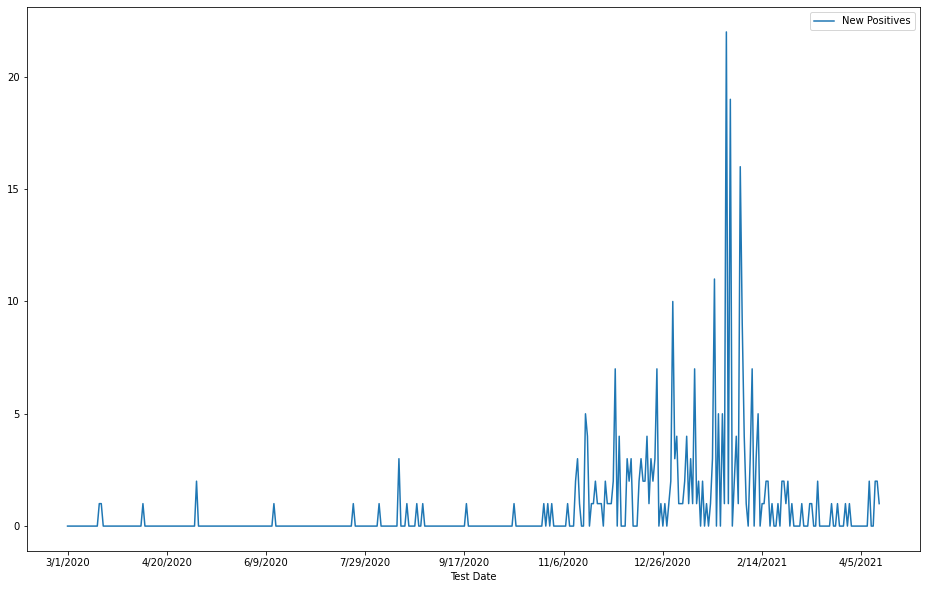

<Figure size 432x288 with 0 Axes>

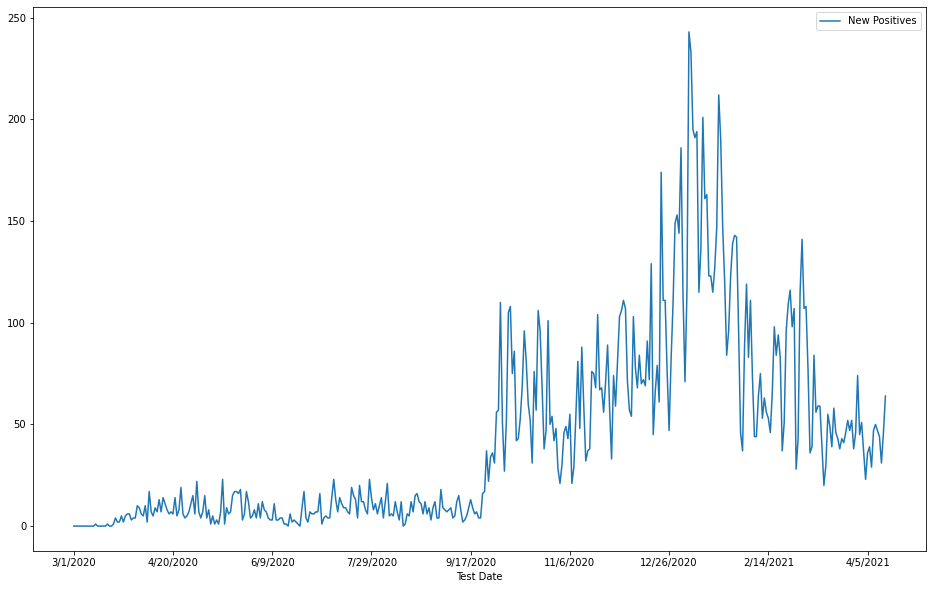

<Figure size 432x288 with 0 Axes>

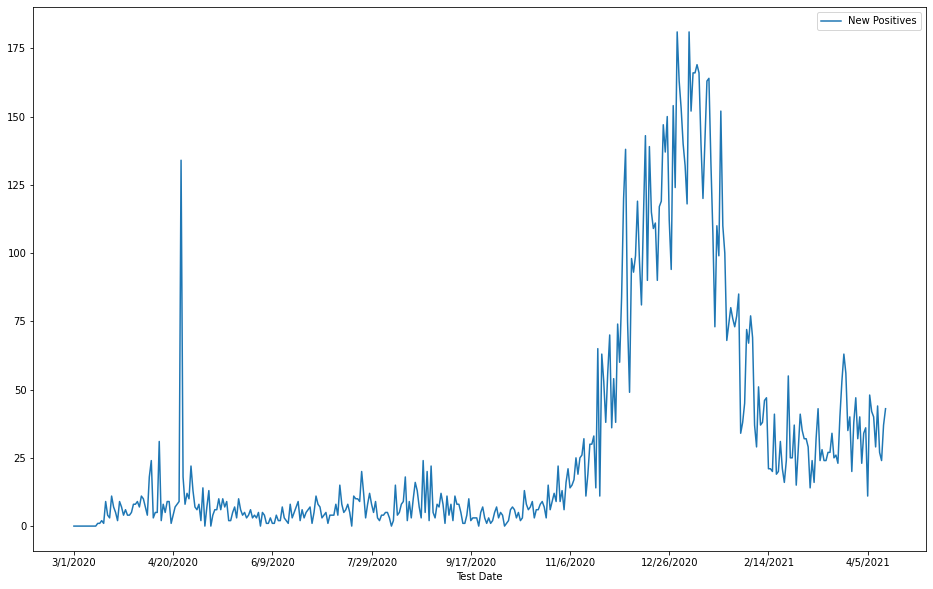

<Figure size 432x288 with 0 Axes>

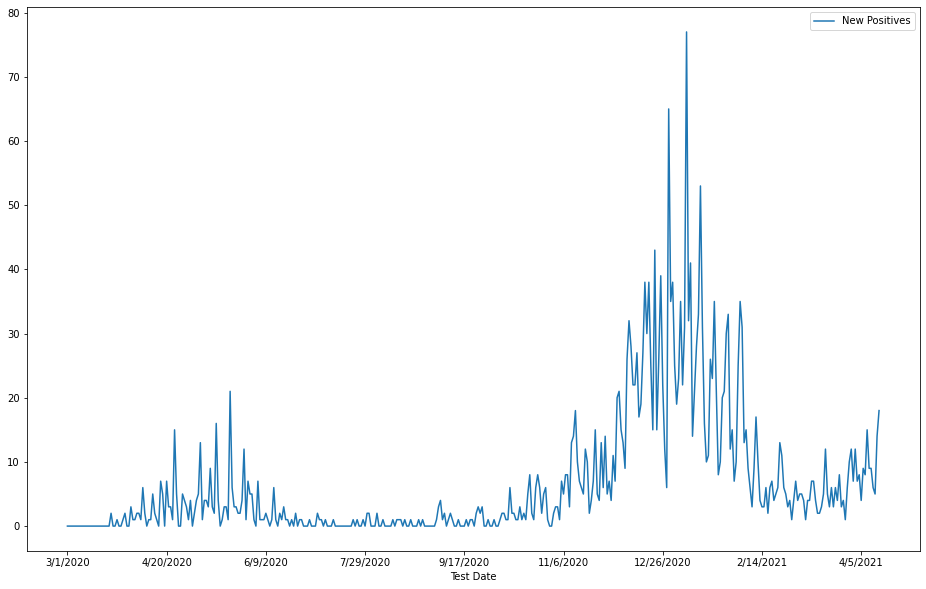

<Figure size 432x288 with 0 Axes>

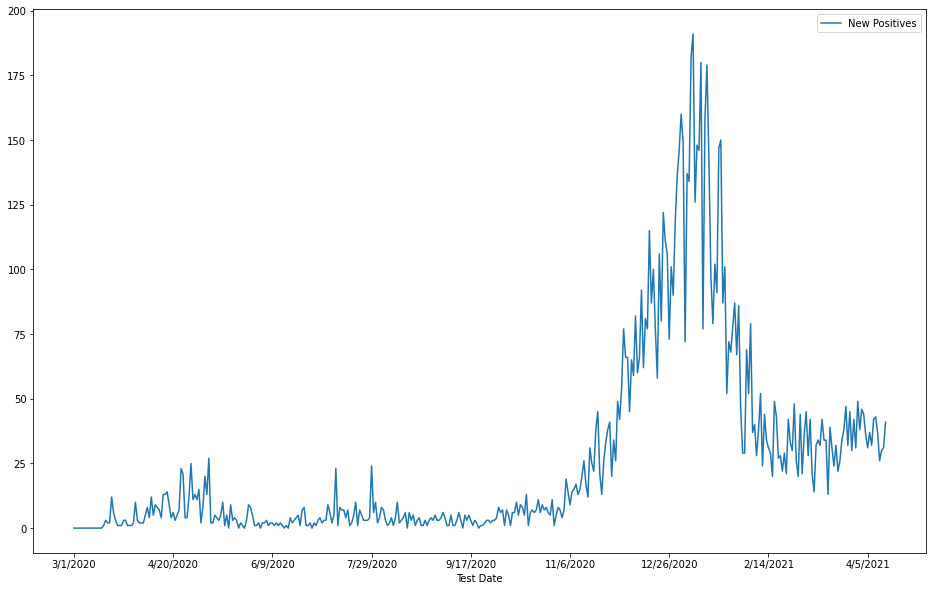

<Figure size 432x288 with 0 Axes>

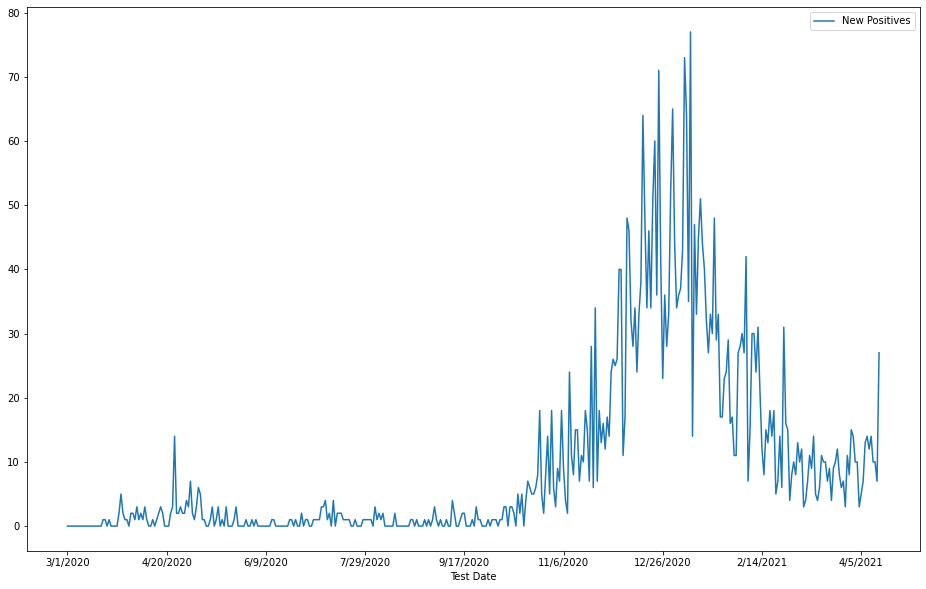

<Figure size 432x288 with 0 Axes>

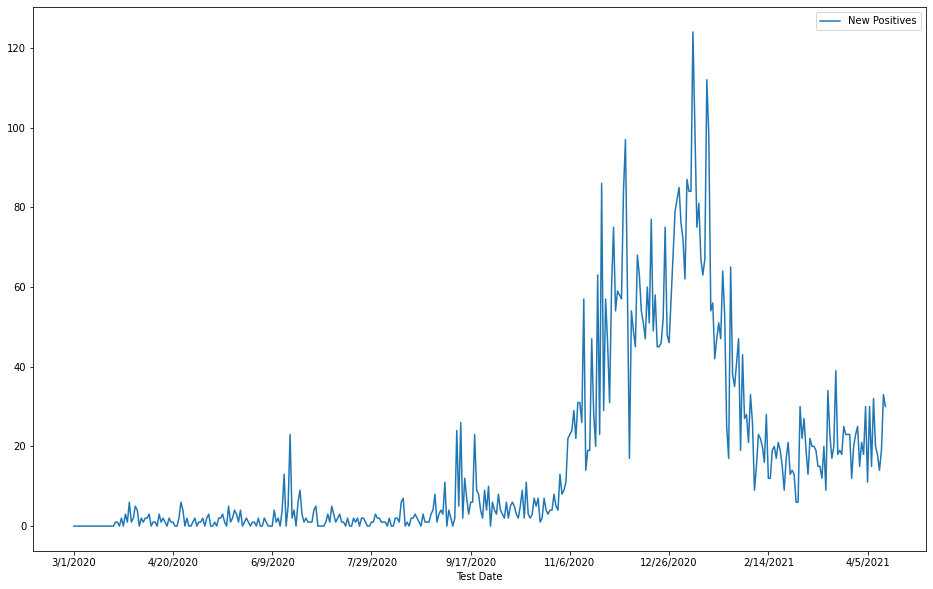

<Figure size 432x288 with 0 Axes>

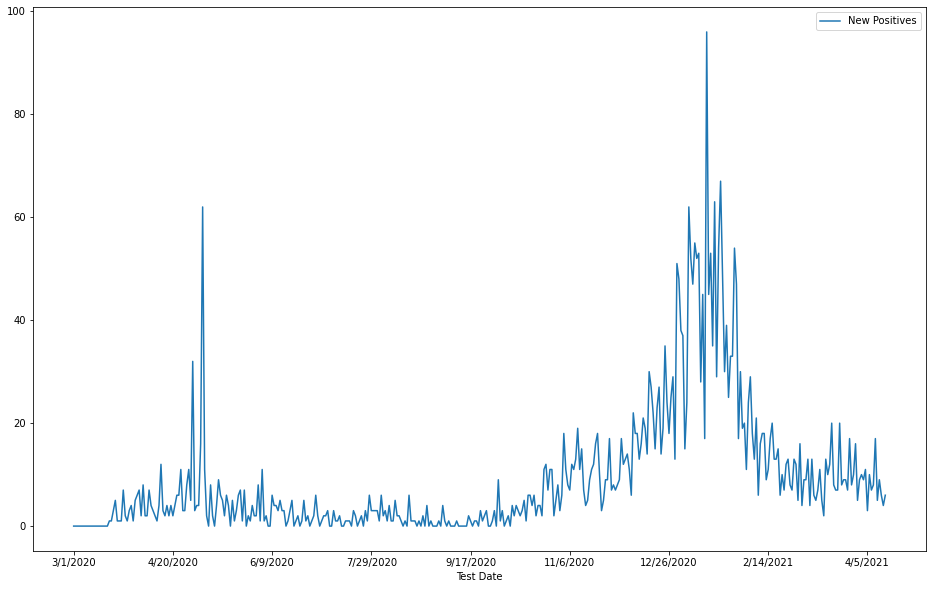

<Figure size 432x288 with 0 Axes>

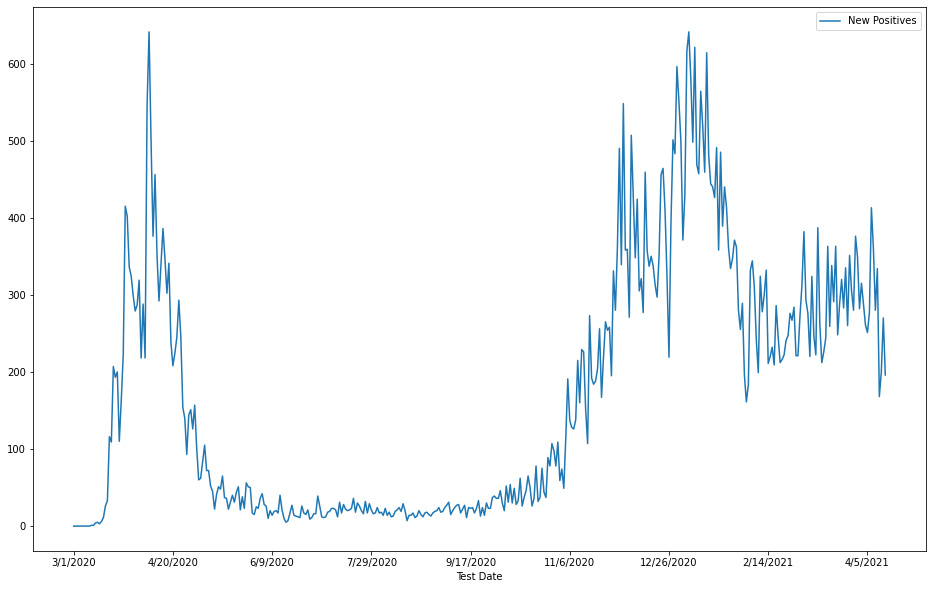

<Figure size 432x288 with 0 Axes>

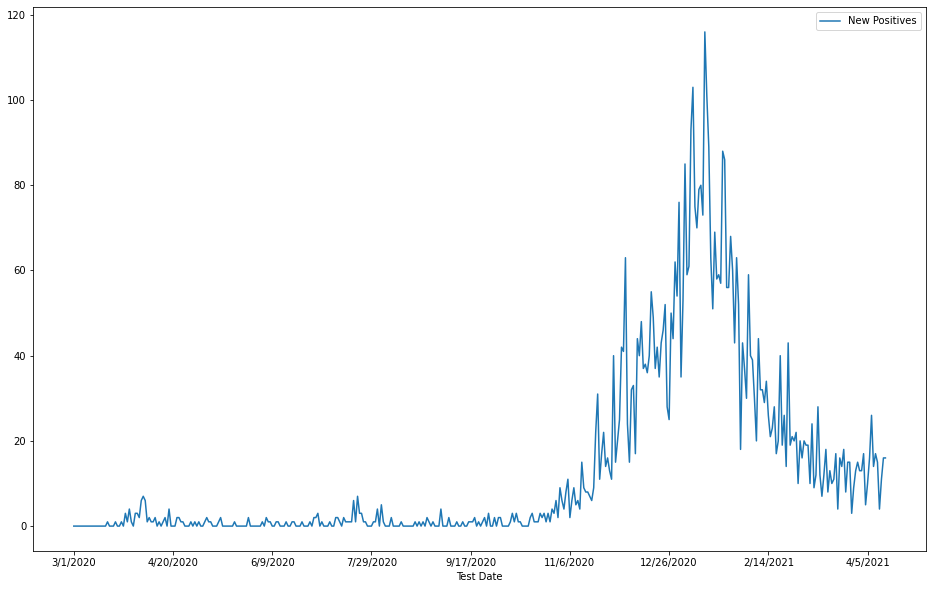

<Figure size 432x288 with 0 Axes>

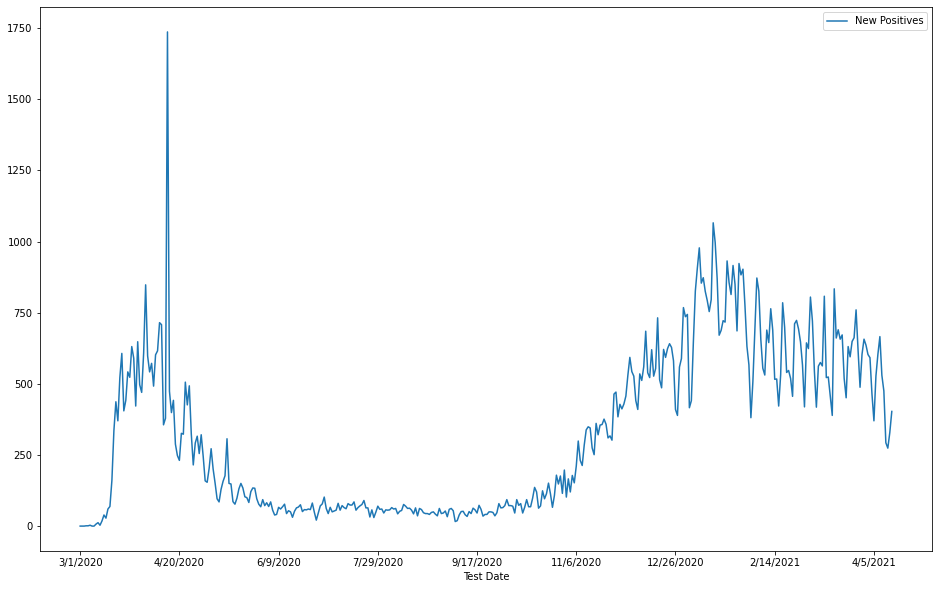

<Figure size 432x288 with 0 Axes>

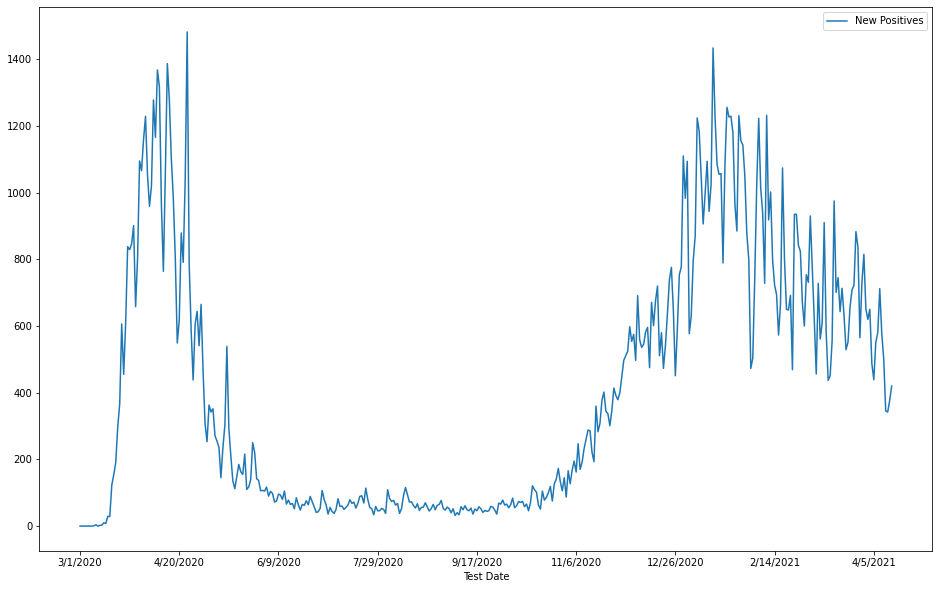

<Figure size 432x288 with 0 Axes>

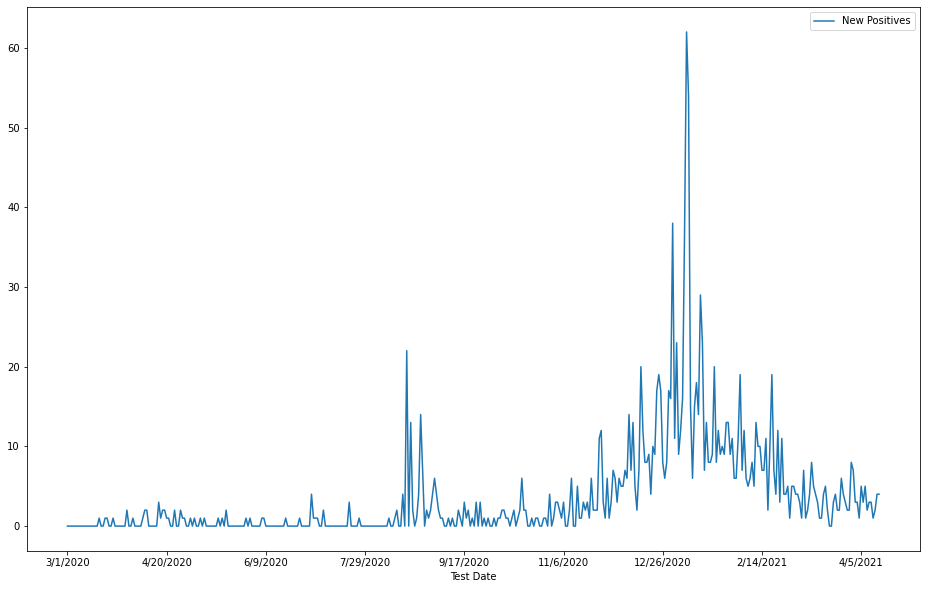

<Figure size 432x288 with 0 Axes>

In [ ]:
for county in listCounties: 
    dfCounty = GetCountyData(dfNYCovid,county)
    DrawGraph(dfCounty,county)